In [27]:
import sqlite3
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re



In [28]:
# Connect to the SQLite database
con = sqlite3.connect("Topic1_dataset.sqlite")

# Create a cursor to execute SQL commands
cur = con.cursor()

In [29]:
cur.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cur.fetchall()
tables

[('sqlite_sequence',), ('products',), ('purchase',), ('sales',), ('shops',)]

# Preview tables


In [30]:
def get_pd_dataframe(query, connection):
    return pd.read_sql_query(query, connection)

products_preview = get_pd_dataframe("SELECT * FROM products ;", con)

purchase_preview = get_pd_dataframe("SELECT * FROM purchase ;", con)

shops_preview = get_pd_dataframe("SELECT * FROM shops;", con)

sales_preview = get_pd_dataframe("SELECT * FROM sales;", con)


In [31]:
shops_preview

,location,shopname,isactive,shopadd1,shopadd2,shopadd3,shopadd4
0,01,OFFICE,Y,Active Minds Ltd.,"Blk A, 6/F., Tai Ping Industrial Park,","51 Ting Kok Road,","Tai Po, N.T."
1,02,BOOK FAIR,Y,Active Minds Ltd.,Tel: (852) 2690-4766,None,None
2,03,BOOK CASTLE-OT,Y,Book Castle - OT,"OT G45-G46, G/F, Ocean Terminal","Harbour City, Kowloon.",Tel: 2737 2343 Fax: 2737 2344
3,04,BOOK BUDDY - WH,Y,Book Buddy - WH,"Shop 208, 2/F., Windsor House,","311 Gloucester Road, CWB, H.K.",Tel: 2376 2230 Fax: 2376 2280
4,05,School Bookfair,Y,Active Minds Ltd.,Tel: (852) 2690-4766,Fax: (852) 2690-3422,None
5,06,CONSIGNMENT,Y,All Locations - Sales & Return,None,None,None
6,07,ASMK,Y,Artistic Studios - MK,"Shops 310-311, Level 3, Moko,",193 Prince Edward Rd W. Mongkok,Tel: 2320 2256 Fax: 2320 6690
7,08,BOOK CASTLE-LG2,Y,Book Castle - LG2,"Shops 217-218, 2/F, Lee GardenII","28 Yun Ping Rd, Causeway Bay, HK",Tel: 2915 6228 Fax: 2915 6998
8,09,Book Buddy -TKO,N,None,None,None,None
9,10,STREAM+b - K11,Y,STREAM + b,"Shop B233, B2, K11 Musea,","18 Salisbury Road, TST, Kln.",Tel: 2301 2830 Fax: 2301 2870


In [32]:
#Update the book store Name
# 1) Define your lookup mapping (OLD -> NEW)
shopname_lookup = {
    "BOOK CASTLE-OT": "BOOK CASTLE - Ocean Terminal",
    "BOOK BUDDY - WH": "BOOK BUDDY - Windsor House(CWB)",
    "ASMK": "Artistic Studios - MK (Moko)",
    "BOOK CASTLE-LG2": "BOOK CASTLE - Lee Garden II(CWB)",
    "STREAM+b - K11": "STREAM+b - K11",
    "WDSS": "Wondersaurus (Southside)",
    "WDSS": "Wondwesaurus (Southside)",  # typo variant to be safe
    "Stream+b - Peak": "Stream+b - Peak Galleria",
    "WD - FW": "Wondersaurus (Festival Walk)",
    "WDAP": "Wondersaurus (Airport)",
    "WDHW": "Wondersaurus (Hopewell Mall)",
    "BOOK CASTLE-YH": "BOOK CASTLE-Yoho",

    # ... add all mappings you need
}

# 2) Replace shopname using the lookup (only replaces when key found; otherwise keeps original)
shops_preview["shopname"] = shops_preview["shopname"].map(lambda x: shopname_lookup.get(str(x).strip(), x))
shops_preview

,location,shopname,isactive,shopadd1,shopadd2,shopadd3,shopadd4
0,01,OFFICE,Y,Active Minds Ltd.,"Blk A, 6/F., Tai Ping Industrial Park,","51 Ting Kok Road,","Tai Po, N.T."
1,02,BOOK FAIR,Y,Active Minds Ltd.,Tel: (852) 2690-4766,None,None
2,03,BOOK CASTLE - Ocean Terminal,Y,Book Castle - OT,"OT G45-G46, G/F, Ocean Terminal","Harbour City, Kowloon.",Tel: 2737 2343 Fax: 2737 2344
3,04,BOOK BUDDY - Windsor House(CWB),Y,Book Buddy - WH,"Shop 208, 2/F., Windsor House,","311 Gloucester Road, CWB, H.K.",Tel: 2376 2230 Fax: 2376 2280
4,05,School Bookfair,Y,Active Minds Ltd.,Tel: (852) 2690-4766,Fax: (852) 2690-3422,None
5,06,CONSIGNMENT,Y,All Locations - Sales & Return,None,None,None
6,07,Artistic Studios - MK (Moko),Y,Artistic Studios - MK,"Shops 310-311, Level 3, Moko,",193 Prince Edward Rd W. Mongkok,Tel: 2320 2256 Fax: 2320 6690
7,08,BOOK CASTLE - Lee Garden II(CWB),Y,Book Castle - LG2,"Shops 217-218, 2/F, Lee GardenII","28 Yun Ping Rd, Causeway Bay, HK",Tel: 2915 6228 Fax: 2915 6998
8,09,Book Buddy -TKO,N,None,None,None,None
9,10,STREAM+b - K11,Y,STREAM + b,"Shop B233, B2, K11 Musea,","18 Salisbury Road, TST, Kln.",Tel: 2301 2830 Fax: 2301 2870


In [33]:
products_preview.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
product,2305,2305,000737108X,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,2305,2285,First Readers (HB): The Three Little Pigs,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,2305.0,NaN,NaN,NaN,73.779826,76.094323,0.0,39.0,49.0,89.9,1299.0
book_original_price,2295,169,39.90,307,NaN,NaN,NaN,NaN,NaN,NaN,NaN
barcode,2194,2184,S9789811108372,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
barcode2,2305,2298,786943004793,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
isbn,590,346,SPECIAL PRICE,224,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
purchase_preview.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
invoice,8650,1481,30004915,66,NaN,NaN,NaN,NaN,NaN,NaN,NaN
product,8650,1602,2764330898,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
quantity,8650.0,NaN,NaN,NaN,154.052948,310.06589,1.0,40.0,72.0,144.0,6000.0
trandate,8650,833,2018-03-21 00:00:00.000,107,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,8650.0,NaN,NaN,NaN,47.67638,46.713965,0.0,11.618,31.4,70.5715,1019.715
discount,8650.0,NaN,NaN,NaN,31.616474,34.753174,0.0,0.0,0.0,70.0,90.0
disc_amt,8650.0,NaN,NaN,NaN,475.103781,3443.278921,0.0,0.0,0.0,0.0,109491.798
amount,8650.0,NaN,NaN,NaN,2761.375047,6648.989256,0.0,701.22,1359.765,2712.96,114000.0


In [35]:
shops_preview.describe(include='all').T

,count,unique,top,freq
location,25,25,01,1
shopname,22,22,OFFICE,1
isactive,25,2,Y,16
shopadd1,20,18,Active Minds Ltd.,3
shopadd2,18,17,Tel: (852) 2690-4766,2
shopadd3,17,16,"Tai Po, N.T.",2
shopadd4,11,11,"Tai Po, N.T.",1


In [36]:
sales_preview.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
channel,636257,5,Retail,382774,NaN,NaN,NaN,NaN,NaN,NaN,NaN
location,636257,18,01,133392,NaN,NaN,NaN,NaN,NaN,NaN,NaN
invoice,636257,225129,40018126,3041,NaN,NaN,NaN,NaN,NaN,NaN,NaN
clients,274138,6240,B7A379,7286,NaN,NaN,NaN,NaN,NaN,NaN,NaN
product,636257,2227,9888155229,2150,NaN,NaN,NaN,NaN,NaN,NaN,NaN
quantity,636257.0,NaN,NaN,NaN,2.487276,18.710801,1.0,1.0,1.0,2.0,5000.0
trandate,636257,4251,2021-03-31 00:00:00.000,4428,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,636257.0,NaN,NaN,NaN,75.936032,72.014439,0.0,39.9,59.0,99.0,1369.0
discount,636257.0,NaN,NaN,NaN,14.153772,19.253235,0.0,0.0,0.0,35.0,100.0
disc_amt,636257.0,NaN,NaN,NaN,4.971692,317.332983,0.0,0.0,0.0,0.0,192465.0


no data missing for the data count

In [37]:
# Group by product and calculate total amount, total quantity, and average cost
avg_cost_by_product = (
    purchase_preview
    .groupby('product')
    .agg(total_amount=('amount', 'sum'),
         total_quantity=('quantity', 'sum'))
    .reset_index()
)

# Calculate average cost per product
avg_cost_by_product['avg_cost'] = avg_cost_by_product['total_amount'] / avg_cost_by_product['total_quantity']

# Display the result
print(avg_cost_by_product.head())

      product  total_amount  total_quantity   avg_cost
0  000737108X    11947.4854             526  22.713851
1  006445083X      117.5145              10  11.751450
2       01091     4592.2500              90  51.025000
3       01093     2296.1250              60  38.268750
4  0140563784   102082.6368            3356  30.417949


In [38]:

# Merge sales_preview with shop_table to get location info
merged_df = sales_preview.merge(shops_preview[['location', 'shopname']], on='location', how='left')
merged_df = merged_df.merge(products_preview[['product', 'title', 'price']].rename(columns={'price': 'market_price'}), on='product', how='left')
merged_df = merged_df.merge(avg_cost_by_product[['product', 'avg_cost']], on='product', how='left')


# Now merged_df contains location info from ship_table
merged_df


,channel,location,invoice,clients,product,quantity,trandate,price,discount,disc_amt,amount,shopname,title,market_price,avg_cost
0,Retail,09,012245,None,1450810063,1,2014-01-01 00:00:00.000,198.0,0.0,0.0,198.0,Book Buddy -TKO,Piano Book Mini-Deluxe: Disney Princess Royal,209.0,43.175000
1,Retail,09,012249,None,9782764320310,1,2014-01-01 00:00:00.000,75.0,0.0,0.0,75.0,Book Buddy -TKO,My First Puzzle Bk: Hello Kitty,85.0,17.034500
2,Retail,09,012254,None,2764318715,1,2014-01-01 00:00:00.000,125.0,0.0,0.0,125.0,Book Buddy -TKO,My Busy Books: Disney Cars 2 - Cool Cars,135.0,31.400000
3,Retail,09,012255,None,140523461X,1,2014-01-01 00:00:00.000,35.0,0.0,0.0,35.0,Book Buddy -TKO,My Thomas Story Library (R): #15 Bulstrode,39.9,NaN
4,Retail,09,012265,None,1445426714,1,2014-01-01 00:00:00.000,99.9,0.0,0.0,99.9,Book Buddy -TKO,Disney Sing-Along: Princess with CD inside,99.9,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636252,Retail,04,267335,None,9781503710160,1,2025-09-11 00:00:00.000,329.0,0.0,0.0,329.0,BOOK BUDDY - Windsor House(CWB),ME Reader Junior: Paw Patrol,329.0,83.624249
636253,Retail,04,267338,9FF68B,9781488910104,1,2025-09-11 00:00:00.000,169.0,0.0,0.0,169.0,BOOK BUDDY - Windsor House(CWB),Art Maker Complete Calligraphy Kit (Portrait w...,169.0,40.464235
636254,Wholesale,01,40041077,B8A09E,9786267013823,2,2025-09-11 00:00:00.000,225.0,35.0,157.5,292.5,OFFICE,文字好好玩 (上冊),225.0,80.128358
636255,Wholesale,01,40041077,B8A09E,9786267013830,2,2025-09-11 00:00:00.000,225.0,35.0,157.5,292.5,OFFICE,文字好好玩(下冊),225.0,81.183358


In [39]:
# Group by channel and clients, calculate total revenue
client_revenue = merged_df.groupby(['channel', 'clients'])['amount'].sum().reset_index()

# Calculate percentage share within each channel
total_by_channel = client_revenue.groupby('channel')['amount'].transform('sum')
client_revenue['percentage'] = (client_revenue['amount'] / total_by_channel) * 100

# Sort by channel and revenue descending
client_revenue = client_revenue.sort_values(['channel', 'amount'], ascending=[True, False])

# Get top 5 clients per channel
top_clients = client_revenue.groupby('channel').head(5)

top_clients

,channel,clients,amount,percentage
53,Bookfair - Roadshow,Wondersaurus - Online Store,2242.49,11.549820
22,Bookfair - Roadshow,6A24C5,1200.00,6.180533
12,Bookfair - Roadshow,34CF92,1196.00,6.159932
43,Bookfair - Roadshow,C0BAC2,949.00,4.887772
19,Bookfair - Roadshow,625202,791.10,4.074517
97,Bookfair - School,FB2452,228956.12,19.379552
89,Bookfair - School,BC6B96,202981.40,17.180971
71,Bookfair - School,68ED0B,166961.75,14.132157
56,Bookfair - School,03BEBD,139447.65,11.803279
78,Bookfair - School,93AB8C,129544.38,10.965036


### Convert the consignment data (with customer Hong Kong Book Fair) to Bookfair - Roadshow

In [40]:
# Change channel to 'Bookfair - Roadshow' if client name is 'Hong Kong Book Fair'
merged_df.loc[merged_df['clients'] == 'Hong Kong Book Fair', 'channel'] = 'Bookfair - Roadshow'

# Verify the update
print(merged_df[merged_df['clients'] == 'Hong Kong Book Fair'][['clients', 'channel']].head())

                   clients              channel
47833  Hong Kong Book Fair  Bookfair - Roadshow
47834  Hong Kong Book Fair  Bookfair - Roadshow
47835  Hong Kong Book Fair  Bookfair - Roadshow
47836  Hong Kong Book Fair  Bookfair - Roadshow
47837  Hong Kong Book Fair  Bookfair - Roadshow


# Sale trend for each channel

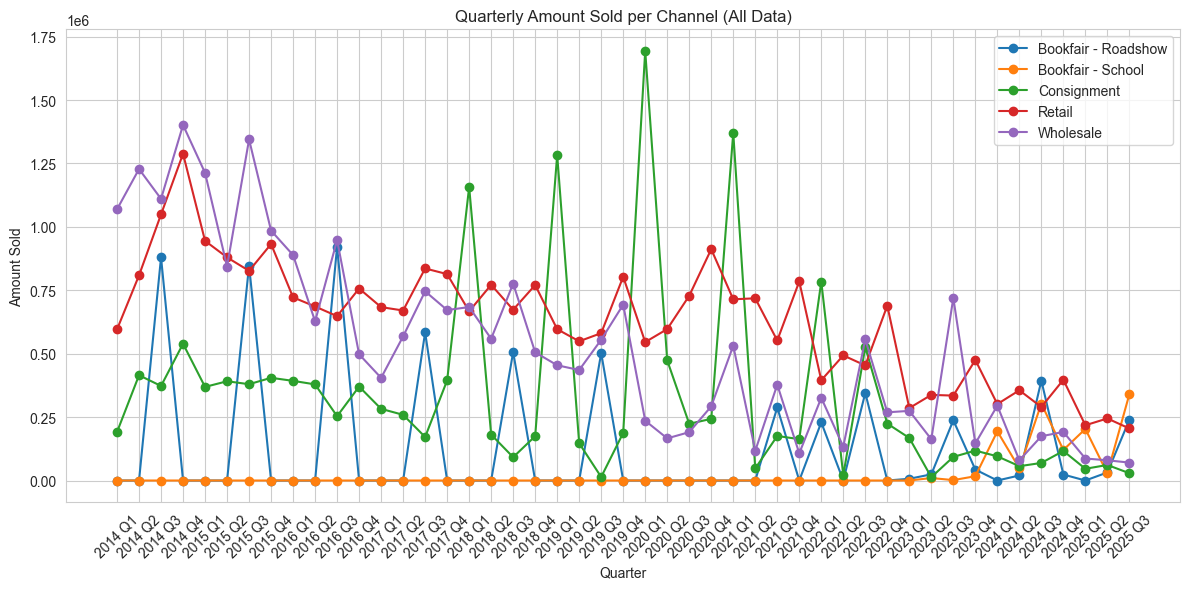

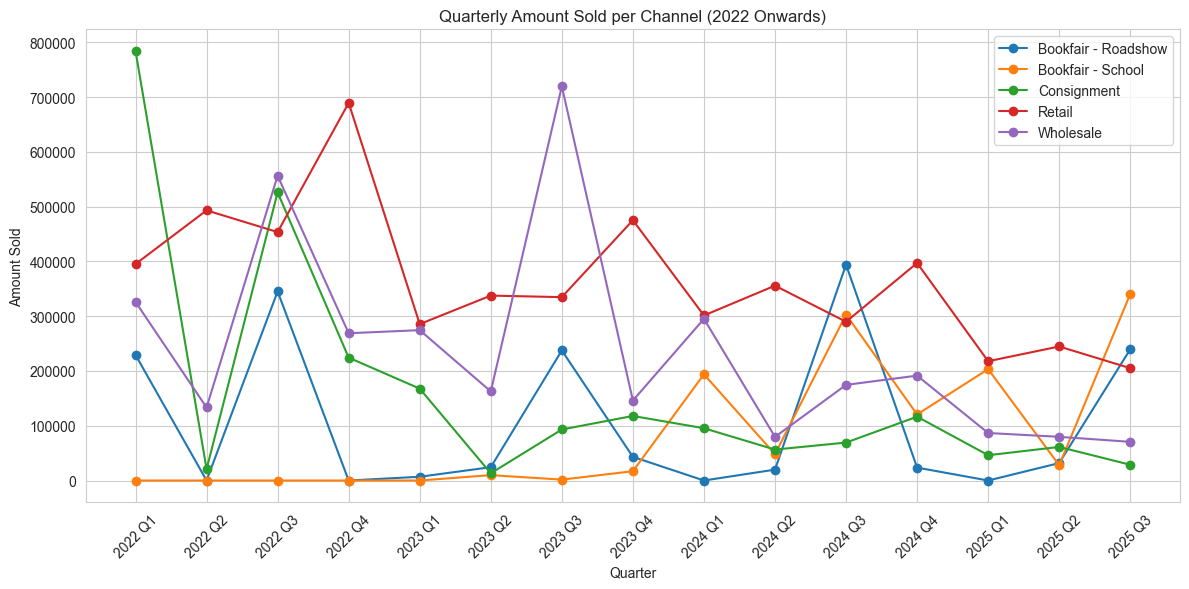

In [41]:
# Convert trandate to datetime
merged_df['trandate'] = pd.to_datetime(merged_df['trandate'])

# Create quarter label in format "QX YYYY"
merged_df['quarter_label'] = merged_df['trandate'].dt.to_period('Q').apply(lambda q: f"{q.year} Q{q.quarter}")

def plot_quarterly(df, title, channel=None):
    # If a specific channel is selected, filter the dataframe
    if channel:
        df = df[df['channel'] == channel]

    # Group by channel and quarter, summing amount
    quarterly_grouped = df.groupby(['channel', 'quarter_label'])['amount'].sum().reset_index()

    # Pivot for plotting
    pivot_df = quarterly_grouped.pivot(index='quarter_label', columns='channel', values='amount').fillna(0)
    pivot_df.index = pivot_df.index.astype(str)  # Ensure readable labels

    # Plot
    plt.figure(figsize=(12, 6))
    for ch in pivot_df.columns:
        plt.plot(pivot_df.index, pivot_df[ch], marker='o', label=ch)

    plt.title(title)
    plt.xlabel('Quarter')
    plt.ylabel('Amount Sold')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


# Chart 1: All data
plot_quarterly(merged_df, 'Quarterly Amount Sold per Channel (All Data)')

# Chart 2: Data from 2022 onwards
filtered_df = merged_df[merged_df['trandate'].dt.year >= 2022]
plot_quarterly(filtered_df, 'Quarterly Amount Sold per Channel (2022 Onwards)')

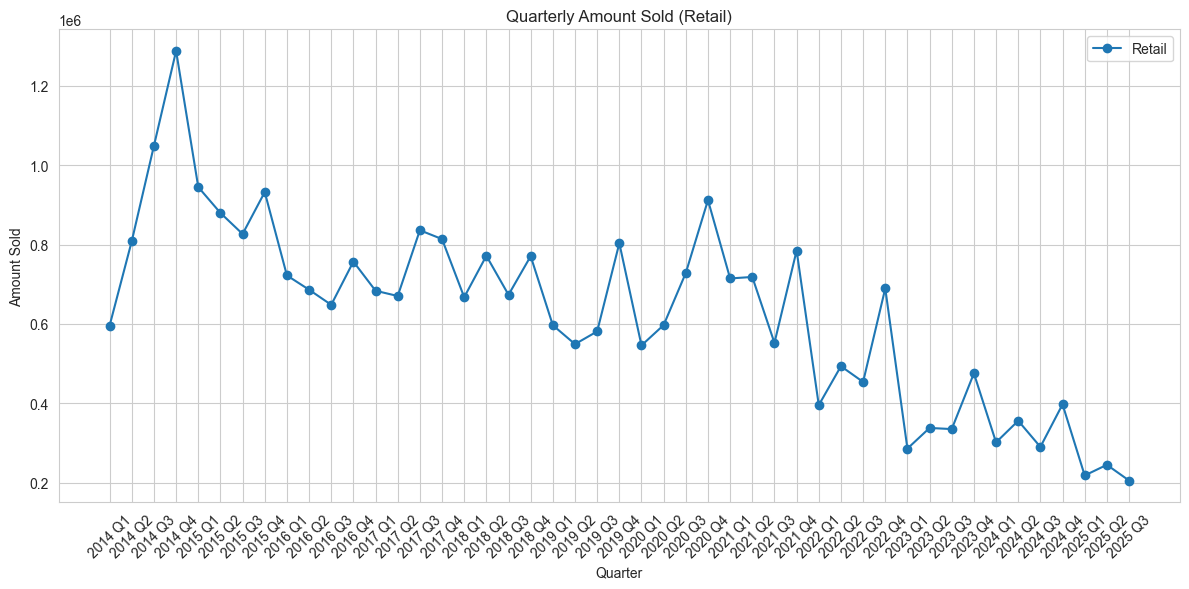

In [42]:
plot_quarterly(merged_df, 'Quarterly Amount Sold (Retail)','Retail')


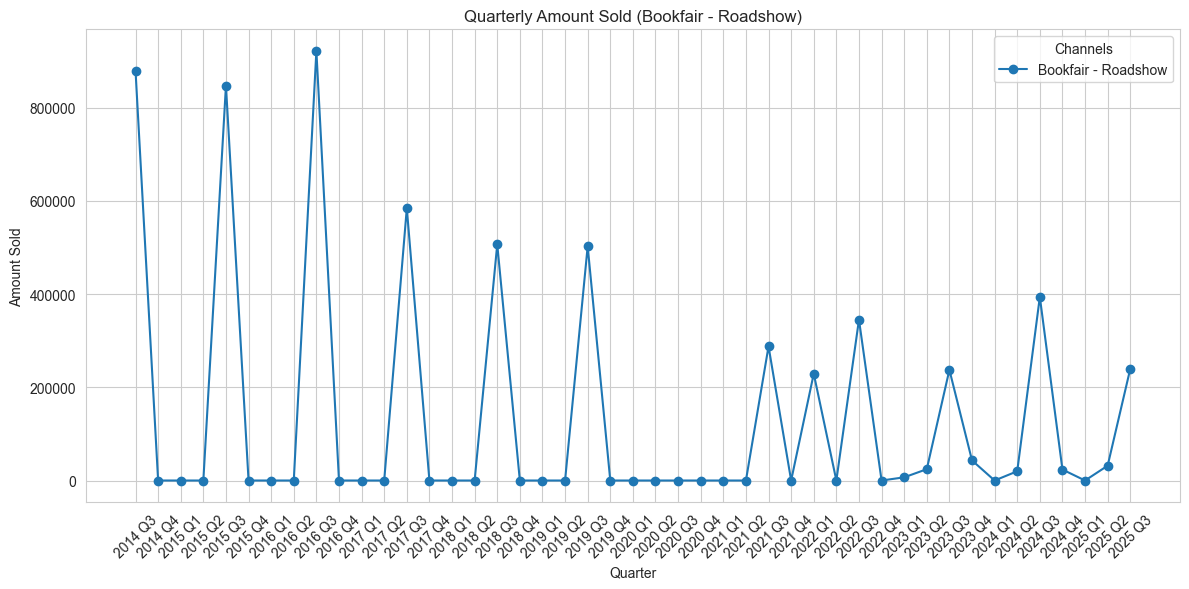

In [43]:
def plot_quarterly_with_highlight(df, title):
    # Group by channel and quarter, summing amount
    quarterly_grouped = df.groupby(['channel', 'quarter_label'])['amount'].sum().reset_index()

    # Get full quarter range from min to max
    min_quarter = pd.Period(quarterly_grouped['quarter_label'].min().replace(" ", ""), freq='Q')
    max_quarter = pd.Period(quarterly_grouped['quarter_label'].max().replace(" ", ""), freq='Q')
    all_quarters = pd.period_range(start=min_quarter, end=max_quarter, freq='Q')
    all_quarters_labels = [f"{q.year} Q{q.quarter}" for q in all_quarters]

    # Pivot for plotting
    pivot_df = quarterly_grouped.pivot(index='quarter_label', columns='channel', values='amount')

    # Reindex to include all quarters, fill missing with 0
    pivot_df = pivot_df.reindex(all_quarters_labels, fill_value=0)

    # Sort index to ensure chronological order
    pivot_df = pivot_df.sort_index()

    # Plot
    plt.figure(figsize=(12, 6))
    for channel in pivot_df.columns:
        plt.plot(pivot_df.index, pivot_df[channel], marker='o', label=channel)


    plt.title(title)
    plt.xlabel('Quarter')
    plt.ylabel('Amount Sold')
    plt.xticks(rotation=45)
    plt.legend(title='Channels')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

filtered_df = merged_df[merged_df['channel'] == 'Bookfair - Roadshow']
plot_quarterly_with_highlight(filtered_df, 'Quarterly Amount Sold (Bookfair - Roadshow)')

In [44]:
merged_df

,channel,location,invoice,clients,product,quantity,trandate,price,discount,disc_amt,amount,shopname,title,market_price,avg_cost,quarter_label
0,Retail,09,012245,None,1450810063,1,2014-01-01,198.0,0.0,0.0,198.0,Book Buddy -TKO,Piano Book Mini-Deluxe: Disney Princess Royal,209.0,43.175000,2014 Q1
1,Retail,09,012249,None,9782764320310,1,2014-01-01,75.0,0.0,0.0,75.0,Book Buddy -TKO,My First Puzzle Bk: Hello Kitty,85.0,17.034500,2014 Q1
2,Retail,09,012254,None,2764318715,1,2014-01-01,125.0,0.0,0.0,125.0,Book Buddy -TKO,My Busy Books: Disney Cars 2 - Cool Cars,135.0,31.400000,2014 Q1
3,Retail,09,012255,None,140523461X,1,2014-01-01,35.0,0.0,0.0,35.0,Book Buddy -TKO,My Thomas Story Library (R): #15 Bulstrode,39.9,NaN,2014 Q1
4,Retail,09,012265,None,1445426714,1,2014-01-01,99.9,0.0,0.0,99.9,Book Buddy -TKO,Disney Sing-Along: Princess with CD inside,99.9,NaN,2014 Q1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636252,Retail,04,267335,None,9781503710160,1,2025-09-11,329.0,0.0,0.0,329.0,BOOK BUDDY - Windsor House(CWB),ME Reader Junior: Paw Patrol,329.0,83.624249,2025 Q3
636253,Retail,04,267338,9FF68B,9781488910104,1,2025-09-11,169.0,0.0,0.0,169.0,BOOK BUDDY - Windsor House(CWB),Art Maker Complete Calligraphy Kit (Portrait w...,169.0,40.464235,2025 Q3
636254,Wholesale,01,40041077,B8A09E,9786267013823,2,2025-09-11,225.0,35.0,157.5,292.5,OFFICE,文字好好玩 (上冊),225.0,80.128358,2025 Q3
636255,Wholesale,01,40041077,B8A09E,9786267013830,2,2025-09-11,225.0,35.0,157.5,292.5,OFFICE,文字好好玩(下冊),225.0,81.183358,2025 Q3


In [45]:
# Calculate final price
merged_df['final_price']= merged_df['amount'] / merged_df['quantity']

In [46]:
# Calculate final discount percentage
merged_df['final_discount'] = (merged_df['market_price'] - merged_df['final_price'] ) / merged_df['market_price'] * 100

In [47]:


keywords = ['Guinness World', 'Dog Man', 'Cat Kid', 'Captain Underpants', 'Andy Griffiths']

# Build a case-insensitive regex with word boundaries; escape to handle special chars safely
pattern = r'(?i)\b(?:' + '|'.join(map(re.escape, keywords)) + r')\b'

# Handle NaN titles and return 0/1
merged_df['book_flag'] = (
    merged_df['title']
    .fillna('')
    .str.contains(pattern, regex=True)
    .astype(int)
)


In [48]:

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")  # Grey background

# Define a global color map for channels
CHANNEL_COLORS = {}

def plot_quarterly_channel_product(df, title=None, channel=None, product=None):
    # Validate required columns
    required_cols = {'channel', 'product', 'quarter_label', 'quantity'}
    if not required_cols.issubset(df.columns):
        raise ValueError(f"DataFrame must contain columns: {required_cols}")

    # Filter by channel and product
    if channel:
        df = df[df['channel'] == channel]
    if product:
        df = df[df['product'] == product]

    if df.empty:
        raise ValueError("No data available for the given filters.")

    # Group and pivot
    quarterly_grouped = df.groupby(['channel', 'quarter_label'])['quantity'].sum().reset_index()
    pivot_df = quarterly_grouped.pivot(index='quarter_label', columns='channel', values='quantity').fillna(0)
    pivot_df = pivot_df.sort_index()

    # Assign colors consistently
    for ch in pivot_df.columns:
        if ch not in CHANNEL_COLORS:
            # Assign a new color from tab10 palette
            CHANNEL_COLORS[ch] = plt.cm.tab10(len(CHANNEL_COLORS) % 10)

    # Plot
    fig, ax = plt.subplots(figsize=(12, 6))
    for ch in pivot_df.columns:
        ax.plot(pivot_df.index, pivot_df[ch], marker='o', label=ch, color=CHANNEL_COLORS[ch])

    # Dynamic title
    book_title = df['title'].iloc[0] if 'title' in df.columns else ''
    if not title:
        title = f"Quantity Sold Per Quarter for {product} - {book_title}"
        if channel:
            title += f" - {channel}"

    ax.set_title(title)
    ax.set_xlabel('Quarter')
    ax.set_ylabel('Quantity Sold')
    ax.set_xticks(range(len(pivot_df.index)))
    ax.set_xticklabels(pivot_df.index, rotation=45)
    ax.legend()
    ax.grid(True)



In [49]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

def plot_price_over_time(df, title=None, product=None, channel=None):
    # Validate columns
    required_cols = {'trandate', 'final_price', 'channel','market_price','avg_cost'}
    if not required_cols.issubset(df.columns):
        raise ValueError(f"DataFrame must contain columns: {required_cols}")

    # Convert trandate to datetime
    df['trandate'] = pd.to_datetime(df['trandate'])

    # Apply filters
    if product:
        df = df[df['product'] == product]
    if channel:
        df = df[df['channel'] == channel]

    if df.empty:
        raise ValueError("No data available for the given filters.")

    # Sort by date
    df = df.sort_values('trandate')

    # Plot
    fig, ax = plt.subplots(figsize=(12, 6))
    for ch in df['channel'].unique():
        subset = df[df['channel'] == ch]
        ax.scatter(subset['trandate'], subset['final_price'], label=ch, alpha=0.6, s=20)

    # ✅ Add dotted lines for avg_cost and market_price if columns exist
    if 'avg_cost' in df.columns:
        ax.plot(df['trandate'], df['avg_cost'], linestyle=':', color='green', label='Avg Cost')
    if 'market_price' in df.columns:
        ax.plot(df['trandate'], df['market_price'], linestyle='--', color='red', label='Market Price')

    # Format date axis
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    plt.xticks(rotation=45)

    book_title = df['title'].iloc[0] if 'title' in df.columns else ''
    ax.set_title(title or f"Price Over Time for {product} - {book_title}")
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.legend()
    ax.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

# Top 10 best selling product analysis


In [50]:
top_sell = (
    merged_df.groupby(['product', 'title'])['quantity']
    .sum()
    .reset_index()
    .sort_values(by='quantity', ascending=False)
)

# Get top 10
top_10 = top_sell.head(10)

print("Top 10 products by total unit sold:")
top_10

Top 10 products by total unit sold:


,product,title,quantity
2217,9888155202,Ladder Collection: Thomas & Friends (10 Stories),17106
2218,9888155210,Ladder Collection: Disney Pixar Cars (10 Stories),9678
2219,9888155229,Ladder Treasury for Girls (10 Stories),8272
2176,9789888155972,Disney Frozen Story Collection (10 Stories),6996
2186,9789888367078,Ladder Collection: Thomas & Friends #3 (10 Sto...,6032
2185,9789888367061,Ladder Collection: Thomas & Friends #2 (10 Sto...,6022
2170,9789888155897,Ladder Collection: Disney Classics - Best Stor...,5985
2212,9888138804,Ladder Collection for Girls (10 Stories),5016
2125,9789888155446,Ladder Collection: Barbie (10 Stories),4958
2178,9789888155996,Disney Padded Board Book: Disney Princess - ABC,4911


Overview for the most unit sold book, 9888155202, Ladder Collection: Thomas & Friends (10 Stories)

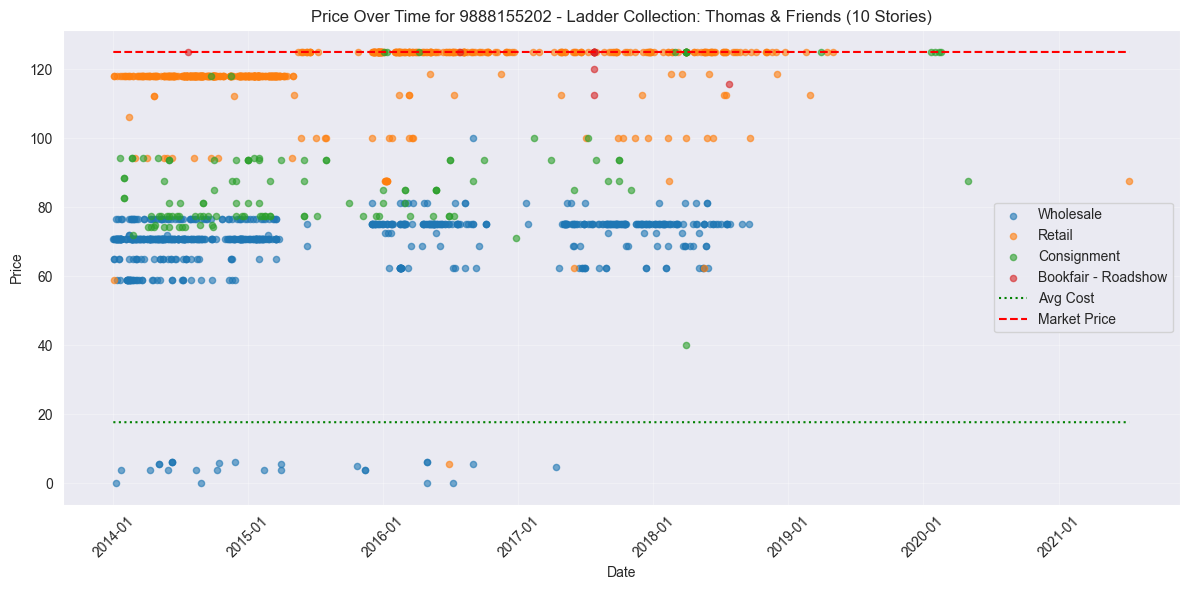

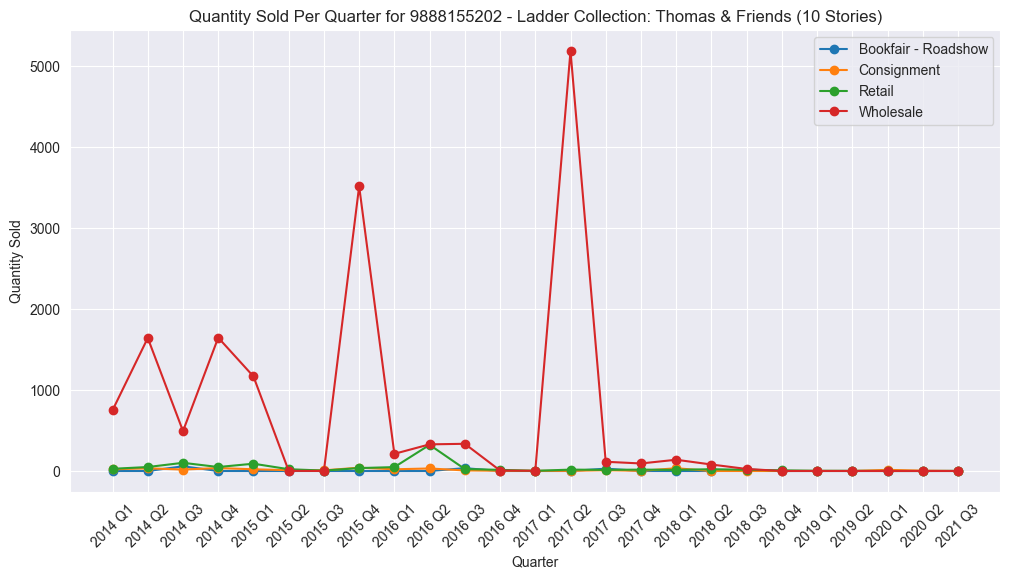

In [51]:
plot_price_over_time(merged_df, product='9888155202')
plot_quarterly_channel_product(merged_df, product='9888155202')

In [52]:
top1_sale_record = merged_df[merged_df['product'] == '9888155202']
top1_sale_record[top1_sale_record['channel'] == 'Wholesale'][top1_sale_record['final_price'] < top1_sale_record['avg_cost'] ]

C:\Users\Graham\AppData\Local\Temp\ipykernel_14508\477651902.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  top1_sale_record[top1_sale_record['channel'] == 'Wholesale'][top1_sale_record['final_price'] < top1_sale_record['avg_cost'] ]


,channel,location,invoice,clients,product,quantity,trandate,price,discount,disc_amt,amount,shopname,title,market_price,avg_cost,quarter_label,final_price,final_discount,book_flag
1924,Wholesale,01,30040755,3F9A36,9888155202,1,2014-01-09,0.00,0.0,0.0,0.00,OFFICE,Ladder Collection: Thomas & Friends (10 Stories),125.0,17.657177,2014 Q1,0.0000,100.0000,0
4894,Wholesale,01,30041095,44094C,9888155202,200,2014-01-21,3.70,0.0,0.0,740.00,OFFICE,Ladder Collection: Thomas & Friends (10 Stories),125.0,17.657177,2014 Q1,3.7000,97.0400,0
20161,Wholesale,01,30043305,44094C,9888155202,400,2014-04-09,3.70,0.0,0.0,1480.00,OFFICE,Ladder Collection: Thomas & Friends (10 Stories),125.0,17.657177,2014 Q2,3.7000,97.0400,0
26812,Wholesale,01,30043958,95E4BE,9888155202,600,2014-05-05,15.99,65.0,0.0,3357.90,OFFICE,Ladder Collection: Thomas & Friends (10 Stories),125.0,17.657177,2014 Q2,5.5965,95.5228,0
26836,Wholesale,01,30043959,95E4BE,9888155202,20,2014-05-05,15.99,65.0,0.0,111.93,OFFICE,Ladder Collection: Thomas & Friends (10 Stories),125.0,17.657177,2014 Q2,5.5965,95.5228,0
32652,Wholesale,01,30044808,44094C,9888155202,200,2014-05-30,3.70,0.0,0.0,740.00,OFFICE,Ladder Collection: Thomas & Friends (10 Stories),125.0,17.657177,2014 Q2,3.7000,97.0400,0
36178,Wholesale,01,30044992,1A4CBD,9888155202,10,2014-06-09,6.00,0.0,0.0,60.00,OFFICE,Ladder Collection: Thomas & Friends (10 Stories),125.0,17.657177,2014 Q2,6.0000,95.2000,0
36182,Wholesale,01,30044992,1A4CBD,9888155202,20,2014-06-09,6.00,0.0,0.0,120.00,OFFICE,Ladder Collection: Thomas & Friends (10 Stories),125.0,17.657177,2014 Q2,6.0000,95.2000,0
36183,Wholesale,01,30044992,1A4CBD,9888155202,20,2014-06-09,6.00,0.0,0.0,120.00,OFFICE,Ladder Collection: Thomas & Friends (10 Stories),125.0,17.657177,2014 Q2,6.0000,95.2000,0
53413,Wholesale,01,30046480,44094C,9888155202,160,2014-08-12,3.70,0.0,0.0,592.00,OFFICE,Ladder Collection: Thomas & Friends (10 Stories),125.0,17.657177,2014 Q3,3.7000,97.0400,0


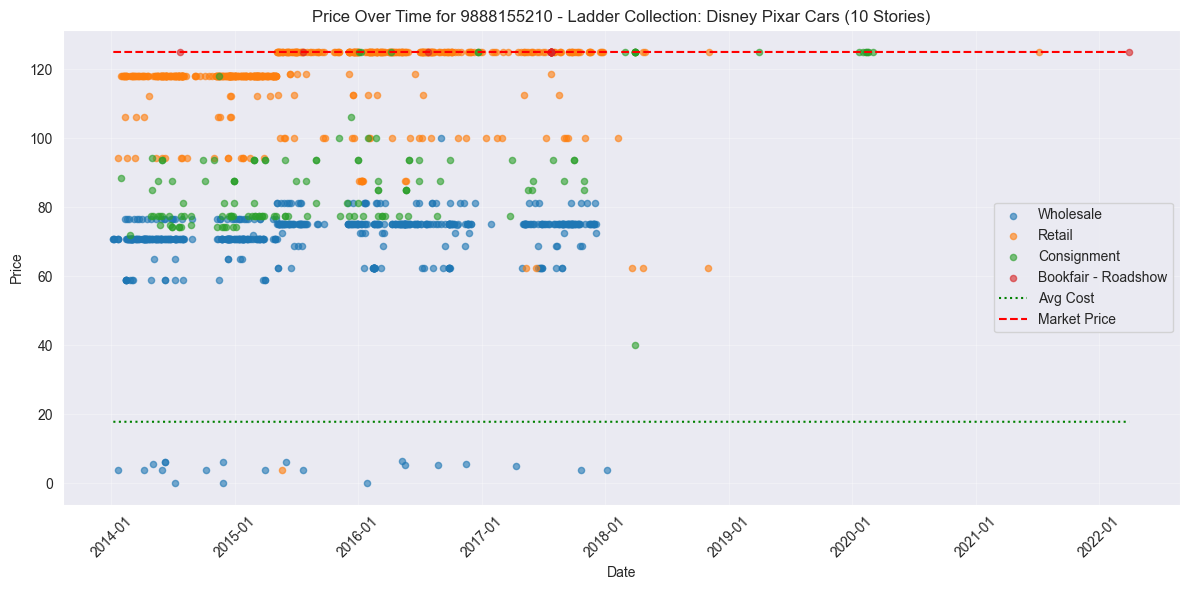

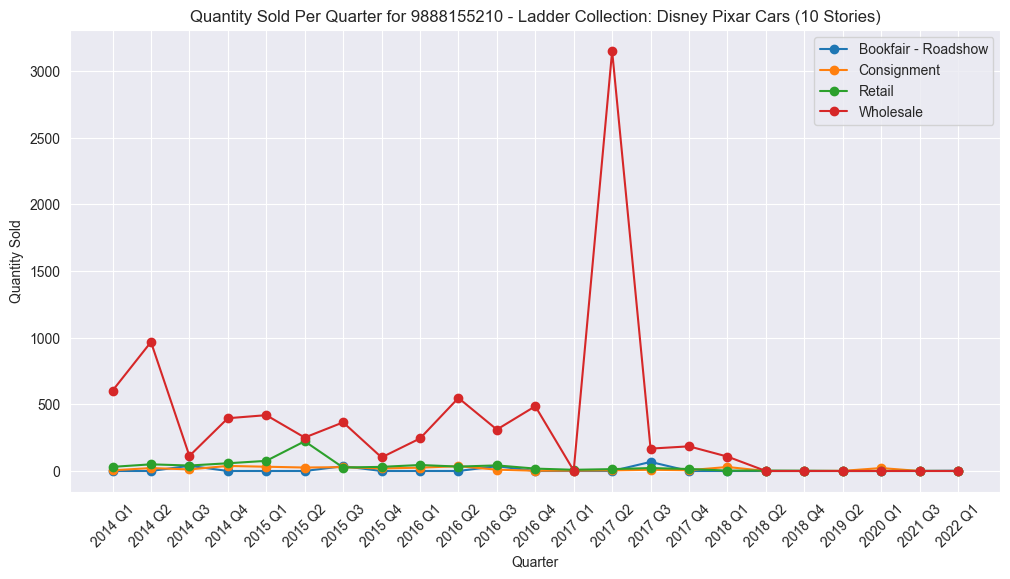

In [53]:
plot_price_over_time(merged_df, product='9888155210')
plot_quarterly_channel_product(merged_df, product='9888155210')

In [54]:
top1_sale_record = merged_df[merged_df['product'] == '9888155210']
top1_sale_record[top1_sale_record['channel'] == 'Wholesale'][top1_sale_record['final_price'] < top1_sale_record['avg_cost'] ]

C:\Users\Graham\AppData\Local\Temp\ipykernel_14508\1833524400.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  top1_sale_record[top1_sale_record['channel'] == 'Wholesale'][top1_sale_record['final_price'] < top1_sale_record['avg_cost'] ]


,channel,location,invoice,clients,product,quantity,trandate,price,discount,disc_amt,amount,shopname,title,market_price,avg_cost,quarter_label,final_price,final_discount,book_flag
4896,Wholesale,01,30041095,44094C,9888155210,300,2014-01-21,3.70,0.0,0.0,1110.00,OFFICE,Ladder Collection: Disney Pixar Cars (10 Stories),125.0,17.785503,2014 Q1,3.700,97.0400,0
20162,Wholesale,01,30043305,44094C,9888155210,400,2014-04-09,3.70,0.0,0.0,1480.00,OFFICE,Ladder Collection: Disney Pixar Cars (10 Stories),125.0,17.785503,2014 Q2,3.700,97.0400,0
26834,Wholesale,01,30043959,95E4BE,9888155210,5,2014-05-05,15.99,65.0,0.0,27.99,OFFICE,Ladder Collection: Disney Pixar Cars (10 Stories),125.0,17.785503,2014 Q2,5.598,95.5216,0
32653,Wholesale,01,30044808,44094C,9888155210,200,2014-05-30,3.70,0.0,0.0,740.00,OFFICE,Ladder Collection: Disney Pixar Cars (10 Stories),125.0,17.785503,2014 Q2,3.700,97.0400,0
36179,Wholesale,01,30044992,1A4CBD,9888155210,10,2014-06-09,6.00,0.0,0.0,60.00,OFFICE,Ladder Collection: Disney Pixar Cars (10 Stories),125.0,17.785503,2014 Q2,6.000,95.2000,0
36184,Wholesale,01,30044992,1A4CBD,9888155210,20,2014-06-09,6.00,0.0,0.0,120.00,OFFICE,Ladder Collection: Disney Pixar Cars (10 Stories),125.0,17.785503,2014 Q2,6.000,95.2000,0
44906,Wholesale,01,30045548,454669,9888155210,1,2014-07-08,0.00,0.0,0.0,0.00,OFFICE,Ladder Collection: Disney Pixar Cars (10 Stories),125.0,17.785503,2014 Q3,0.000,100.0000,0
70556,Wholesale,01,30047953,44094C,9888155210,200,2014-10-09,3.70,0.0,0.0,740.00,OFFICE,Ladder Collection: Disney Pixar Cars (10 Stories),125.0,17.785503,2014 Q4,3.700,97.0400,0
84461,Wholesale,01,30049619,B7A379,9888155210,1,2014-11-27,0.00,0.0,0.0,0.00,OFFICE,Ladder Collection: Disney Pixar Cars (10 Stories),125.0,17.785503,2014 Q4,0.000,100.0000,0
84538,Wholesale,01,30049632,D990C2,9888155210,50,2014-11-27,6.00,0.0,0.0,300.00,OFFICE,Ladder Collection: Disney Pixar Cars (10 Stories),125.0,17.785503,2014 Q4,6.000,95.2000,0


C:\Users\Graham\AppData\Local\Temp\ipykernel_14508\1826397207.py:51: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp1 = plt.boxplot(


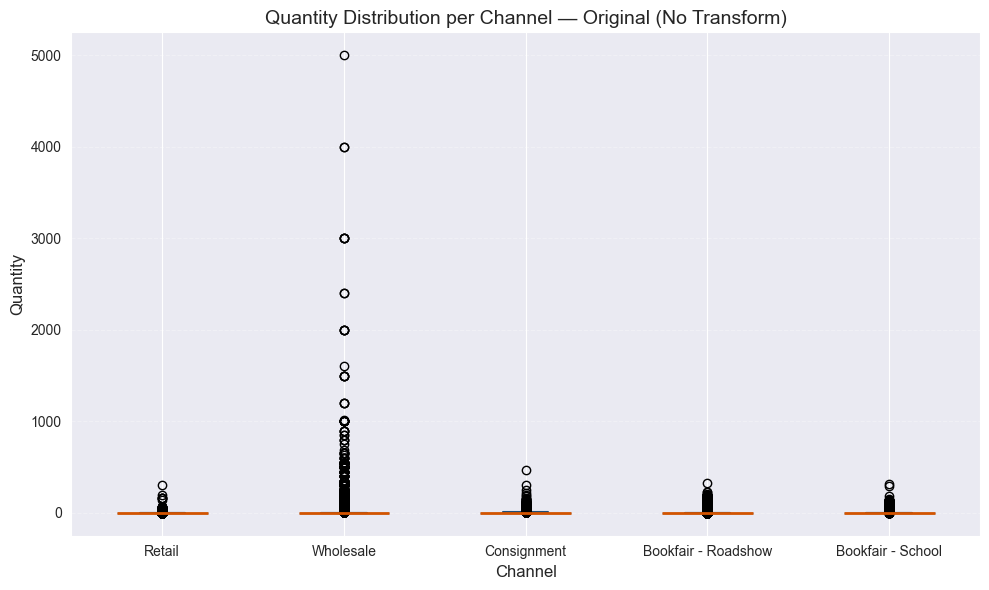

C:\Users\Graham\AppData\Local\Temp\ipykernel_14508\1826397207.py:77: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp2 = plt.boxplot(


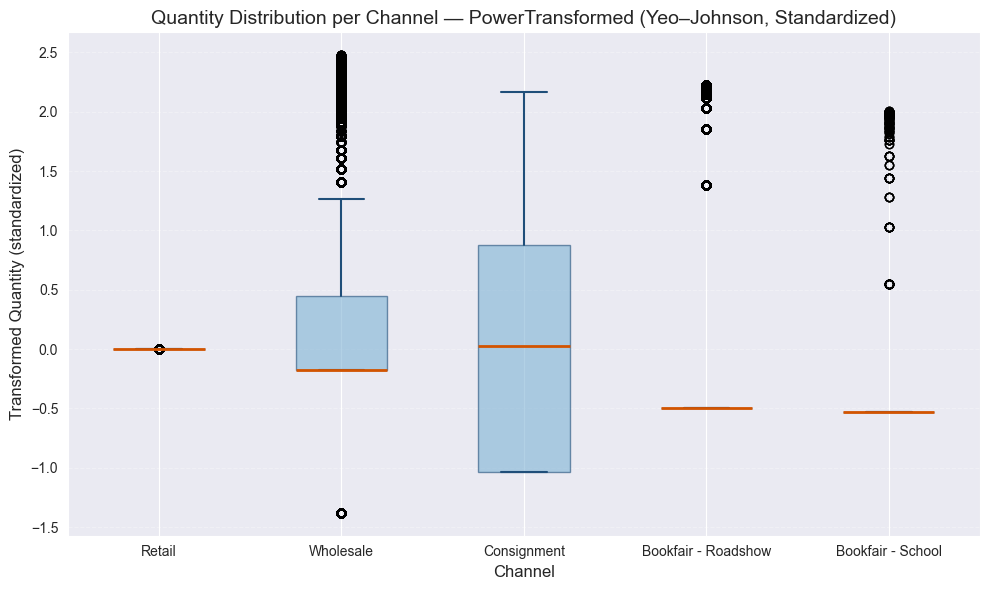

In [55]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer

# --- Config ---
CHANNEL_COL = 'channel'
QUANTITY_COL = 'quantity'
PT_COL = 'quantity_pt'  # new column for transformed values

# --- Make a working copy ---
df = merged_df.copy()

# --- Fit and apply Yeo–Johnson per channel (standardized) ---
pt_by_channel = {}  # store transformers per channel
df[PT_COL] = np.nan

for ch, grp in df.groupby(CHANNEL_COL):
    y = grp[QUANTITY_COL].values.reshape(-1, 1)

    # mask for valid values (exclude NaNs for fitting)
    mask_valid = ~np.isnan(y.ravel())
    if not np.any(mask_valid):
        continue

    y_valid = y[mask_valid].reshape(-1, 1)

    # Fit Yeo–Johnson for this channel; standardize=True -> zero mean, unit variance per channel
    pt = PowerTransformer(method='yeo-johnson', standardize=True)
    y_valid_trans = pt.fit_transform(y_valid)

    # Write back transformed values aligned to original indices
    df.loc[grp.index[mask_valid], PT_COL] = y_valid_trans.ravel()
    pt_by_channel[ch] = pt

# --- Prepare original data per channel ---
channels = df[CHANNEL_COL].dropna().unique().tolist()
data_by_channel_original = [
    df.loc[df[CHANNEL_COL] == ch, QUANTITY_COL].dropna().values
    for ch in channels
]

# --- Prepare transformed data per channel ---
data_by_channel_pt = [
    df.loc[df[CHANNEL_COL] == ch, PT_COL].dropna().values
    for ch in channels
]

# --- Plot 1: Original (without transform) ---
plt.figure(figsize=(10, 6))
bp1 = plt.boxplot(
    data_by_channel_original,
    labels=channels,
    patch_artist=True,
    showfliers=True
)

# Style (same as your original)
for box in bp1['boxes']:
    box.set(facecolor='#7FB3D5', alpha=0.6, edgecolor='#1F4E79')
for whisker in bp1['whiskers']:
    whisker.set(color='#1F4E79', linewidth=1.5)
for cap in bp1['caps']:
    cap.set(color='#1F4E79', linewidth=1.5)
for median in bp1['medians']:
    median.set(color='#D35400', linewidth=2)

plt.title('Quantity Distribution per Channel — Original (No Transform)', fontsize=14)
plt.xlabel('Channel', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# --- Plot 2: Transformed (Yeo–Johnson per channel) ---
plt.figure(figsize=(10, 6))
bp2 = plt.boxplot(
    data_by_channel_pt,
    labels=channels,
    patch_artist=True,
    showfliers=True
)

for box in bp2['boxes']:
    box.set(facecolor='#7FB3D5', alpha=0.6, edgecolor='#1F4E79')
for whisker in bp2['whiskers']:
    whisker.set(color='#1F4E79', linewidth=1.5)
for cap in bp2['caps']:
    cap.set(color='#1F4E79', linewidth=1.5)
for median in bp2['medians']:
    median.set(color='#D35400', linewidth=2)

plt.title('Quantity Distribution per Channel — PowerTransformed (Yeo–Johnson, Standardized)', fontsize=14)
plt.xlabel('Channel', fontsize=12)
plt.ylabel('Transformed Quantity (standardized)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()



C:\Users\Graham\AppData\Local\Temp\ipykernel_14508\1774091257.py:51: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp1 = plt.boxplot(


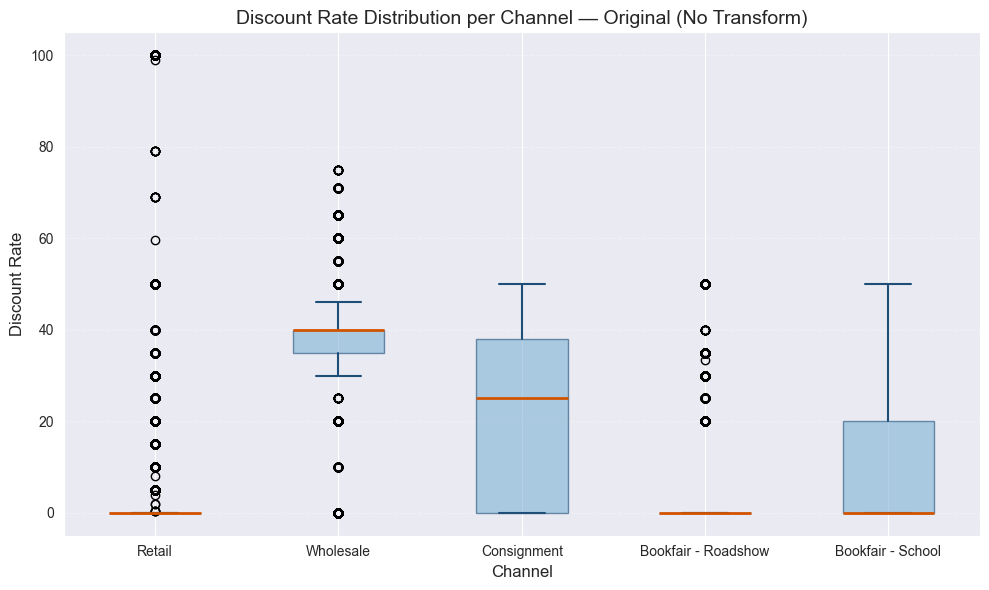

C:\Users\Graham\AppData\Local\Temp\ipykernel_14508\1774091257.py:77: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp2 = plt.boxplot(


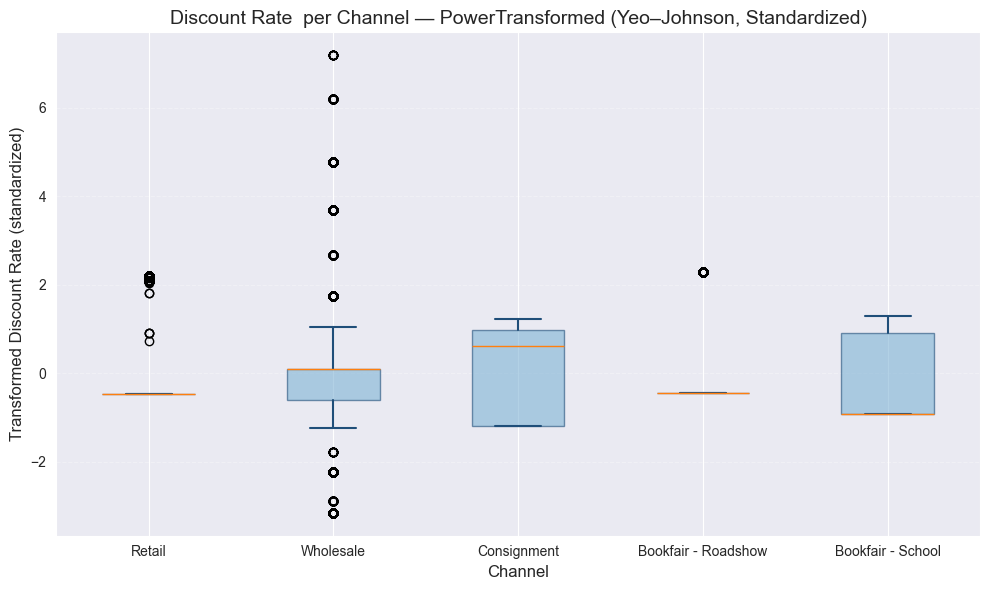

In [56]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer

# --- Config ---
CHANNEL_COL = 'channel'
DISCOUNT_COL = 'discount'      # <-- change if your column name differs
PT_COL = 'discount_rate_pt'         # new column for transformed values

# --- Make a working copy ---
df = merged_df.copy()

# --- Fit and apply Yeo–Johnson per channel (standardized) ---
pt_by_channel_discount = {}  # store transformers per channel for discount
df[PT_COL] = np.nan

for ch, grp in df.groupby(CHANNEL_COL):
    y = grp[DISCOUNT_COL].values.reshape(-1, 1)

    # mask for valid values (exclude NaNs for fitting)
    mask_valid = ~np.isnan(y.ravel())
    if not np.any(mask_valid):
        continue

    y_valid = y[mask_valid].reshape(-1, 1)

    # Fit Yeo–Johnson for this channel; standardize=True -> zero mean, unit variance (per channel)
    pt = PowerTransformer(method='yeo-johnson', standardize=True)
    y_valid_trans = pt.fit_transform(y_valid)

    # Write back transformed values aligned to original indices
    df.loc[grp.index[mask_valid], PT_COL] = y_valid_trans.ravel()
    pt_by_channel_discount[ch] = pt

# --- Prepare original data per channel (discount) ---
channels = df[CHANNEL_COL].dropna().unique().tolist()
data_by_channel_original = [
    df.loc[df[CHANNEL_COL] == ch, DISCOUNT_COL].dropna().values
    for ch in channels
]

# --- Prepare transformed data per channel (discount) ---
data_by_channel_pt = [
    df.loc[df[CHANNEL_COL] == ch, PT_COL].dropna().values
    for ch in channels
]

# --- Plot 1: Original (no transform) ---
plt.figure(figsize=(10, 6))
bp1 = plt.boxplot(
    data_by_channel_original,
    labels=channels,
    patch_artist=True,
    showfliers=True
)

# Styling (consistent with your quantity plot)
for box in bp1['boxes']:
    box.set(facecolor='#7FB3D5', alpha=0.6, edgecolor='#1F4E79')
for whisker in bp1['whiskers']:
    whisker.set(color='#1F4E79', linewidth=1.5)
for cap in bp1['caps']:
    cap.set(color='#1F4E79', linewidth=1.5)
for median in bp1['medians']:
    median.set(color='#D35400', linewidth=2)

plt.title('Discount Rate Distribution per Channel — Original (No Transform)', fontsize=14)
plt.xlabel('Channel', fontsize=12)
plt.ylabel('Discount Rate', fontsize=12)  # e.g., proportion or %
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# --- Plot 2: Transformed (Yeo–Johnson per channel) ---
plt.figure(figsize=(10, 6))
bp2 = plt.boxplot(
    data_by_channel_pt,
    labels=channels,
    patch_artist=True,
    showfliers=True
)

for box in bp2['boxes']:
    box.set(facecolor='#7FB3D5', alpha=0.6, edgecolor='#1F4E79')
for whisker in bp2['whiskers']:
    whisker.set(color='#1F4E79', linewidth=1.5)
for cap in bp2['caps']:
    cap.set(color='#1F4E79', linewidth=1.5)

plt.title('Discount Rate  per Channel — PowerTransformed (Yeo–Johnson, Standardized)', fontsize=14)
plt.xlabel('Channel', fontsize=12)
plt.ylabel('Transformed Discount Rate (standardized)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


## Wholesale Channel:
### The quantity sold is much higher than the average.
### Prices are lower, with a high average discount applied.

## Consignment Channel:
### Prices are lower, also with a high average discount applied.

# Target book series analysis


In [57]:
dog_man_records = products_preview[products_preview['title'].str.contains('Dog man', case=False, na=False)]
dog_man_records

,product,title,price,book_original_price,barcode,barcode2,isbn
1122,9780545581608,Dog Man HB (OP),99.9,99.90,9780545581608,9780545581608,FINAL SALE
1132,9780545935173,Dog Man #05 HB: Lord of the Fleas (OP),99.9,99.90,0545935172,9780545935173,FINAL SALE
1133,9780545935180,Dog Man #04 HB: Dog Man And Cat Kid (OP),99.9,99.90,0545935180,9780545935180,FINAL SALE
1134,9780545935203,Dog Man #02 HB: Unleashed (OP),99.9,99.90,9780545935203,9780545935203,FINAL SALE
1135,9780545935210,Dog Man #03 HB: A Tale of Two Kitties (OP),99.9,99.90,0545935210,9780545935210,FINAL SALE
1249,9781338230642,UK-Dog Man The Epic 3 Books Collection By Dav ...,279.0,279,9781338230642,9781338230642,None
1250,9781338236576,Dog Man #06 HB: Brawl Of the Wild (OP),99.9,79.00,1338236571,9781338236576,FINAL SALE
1251,9781338236590,Dog Man #07 HB: For Whom The Ball Rolls,129.9,$129.90,1338236598,9781338236590,SPECIAL PRICE
1259,9781338323214,Dog Man #8 HB: Fetch-22,129.9,129.90,1338323210,9781338323214,SPECIAL PRICE
1263,9781338535624,Dog Man #9 HB: Grime and Punishment,129.9,129.90,1338535625,9781338535624,SPECIAL PRICE


In [58]:
dog_man_records03 = products_preview[
    products_preview['title'].str.contains('Dog Man', case=False, na=False) &
    products_preview['title'].str.contains('#10', case=False, na=False)
]
dog_man_records03

,product,title,price,book_original_price,barcode,barcode2,isbn
1267,9781338680454,Dog Man #10 HB: Mothering Heights,129.9,129.90,1338680455,9781338680454,FIXED PRICE
2161,9789814947657,Dog Man (PB) #10 : Mothering Heights,89.9,89.90,9814947652,9789814947657,None
2304,PREORDER-03,Pre-order: Dog Man #10 Mothering Heights (9781...,0.0,None,000728,000728,None


In [59]:
cat_kid_records = products_preview[products_preview['title'].str.contains('Cat kid', case=False, na=False)]
cat_kid_records

,product,title,price,book_original_price,barcode,barcode2,isbn
1133,9780545935180,Dog Man #04 HB: Dog Man And Cat Kid (OP),99.9,99.90,0545935180,9780545935180,FINAL SALE
1268,9781338712766,Cat Kid Comic Club #1,129.9,129.90,1338712764,9781338712766,FIXED PRICE
1272,9781338741063,Dog Man #04 HB: Dog Man & Cat Kid,129.9,129.90,9781338741063,9781338741063,None
1275,9781338784855,Cat Kid Comic Club #2: Perspectives HB,129.9,129.90,1338784854,9781338784855,None
1278,9781338801941,Cat Kid Comic Club #3: On Purpose HB,129.9,99.00,1338801945,9781338801941,None
1280,9781338846621,Cat Kid Comic Club #4: Collaborations HB,129.9,99.00,1338846620,9781338846621,None
1811,9781742971414,Billie B Brown #15: The Copycat Kid,49.0,49.00,None,9781742971414,None
2138,9789813378124,Dav Pilkey - Cat Kid Comic Club #2: Perspectives,89.9,89.90,9789813378124,9789813378124,9789813378124
2139,9789813387171,Dav Pilkey - Cat Kid Comic Club #4 Collaborations,89.9,89.90,9789813387171,9789813387171,None
2141,9789813387386,Dav Pilkey - Cat Kid Comic Club #3: On Purpose,89.9,89.90,9789813387386,9789813387386,9789813387386


In [60]:
Andy_Griffiths = products_preview[products_preview['title'].str.contains('Andy Griffiths', case=False, na=False)]
Andy_Griffiths

,product,title,price,book_original_price,barcode,barcode2,isbn
1244,9781035039159,Andy Griffiths: The 13-Storey Treehouse (Colou...,139.0,139.00,9781035039159,9781035039159,None
1245,9781035044450,Andy Griffiths: The 39-Storey Treehouse (Colou...,135.0,135.00,9781035044450,9781035044450,None
1403,9781447279785,Andy Griffiths: The 13-Storey Treehouse (Expor...,89.0,95.00,9781447279785,9781447279785,SPECIAL PRICE
1404,9781447279808,Andy Griffiths: The 26-Storey Treehouse,89.0,95.00,9781447279808,9781447279808,SPECIAL PRICE
1405,9781447281580,Andy Griffiths: The 39-Storey Treehouse,89.0,95.00,9781447281580,9781447281580,SPECIAL PRICE
1406,9781447287575,Andy Griffiths: The 52-Storey Treehouse,89.0,95.00,9781447287575,9781447287575,SPECIAL PRICE
1407,9781447287599,Andy Griffiths: The 65-Storey Treehouse,89.0,95.00,9781447287599,9781447287599,SPECIAL PRICE
1676,9781509833757,Andy Griffiths: The 78-Storey Treehouse (Expor...,89.0,95.00,9781509833757,9781509833757,SPECIAL PRICE
1677,9781509833771,Andy Griffiths: The 104-Storey Treehouse,89.0,89.00,1509833773,9781509833771,SPECIAL PRICE
1678,9781509839162,Andy Griffiths: The 91-Storey Treehouse (Expor...,89.0,95.00,150983916X,9781509839162,SPECIAL PRICE


In [61]:
GWrecords = products_preview[products_preview['title'].str.contains('Guinness World', case=False, na=False)]
GWrecords

,product,title,price,book_original_price,barcode,barcode2,isbn
66,0439715652,Guinness World Records: Fearless Feats,49.9,49.90,9780439715652,9780439715652,None
67,0439745845,Guinness World Records: Top 10 Awesome Ocean R...,39.9,39.50,9780439745840,9780439745840,None
68,0439745853,Guinness World Records: Wildlives,49.9,49.90,9780439745857,9780439745857,None
70,0439810574,Guinness World Records: Incredible Collection,79.9,79.90,9780439810579,9780439810579,None
73,043986562X,Guinness World Records : To The Extreme,149.9,149.90,9780439865623,9780439865623,None
238,0843111526,Mad Libs : Guinness World Records,39.9,39.90,None,0843111526,None
244,0843113855,Guinness World Records: Brain Stretching Quiz Pad,59.9,$59.90,9780843113853,9780843113853,None
245,0843113898,Guinness World Records: Mind Boggling Quiz Pad,59.9,$59.90,9780843113891,9780843113891,None
836,184510403X,Guinness World Records: Can You Find It?,59.9,75.00,9781845104030,9781845104030,None
837,1845104048,Guinness World Records: One Minute Challenges,59.9,75.00,9781845104047,9781845104047,None


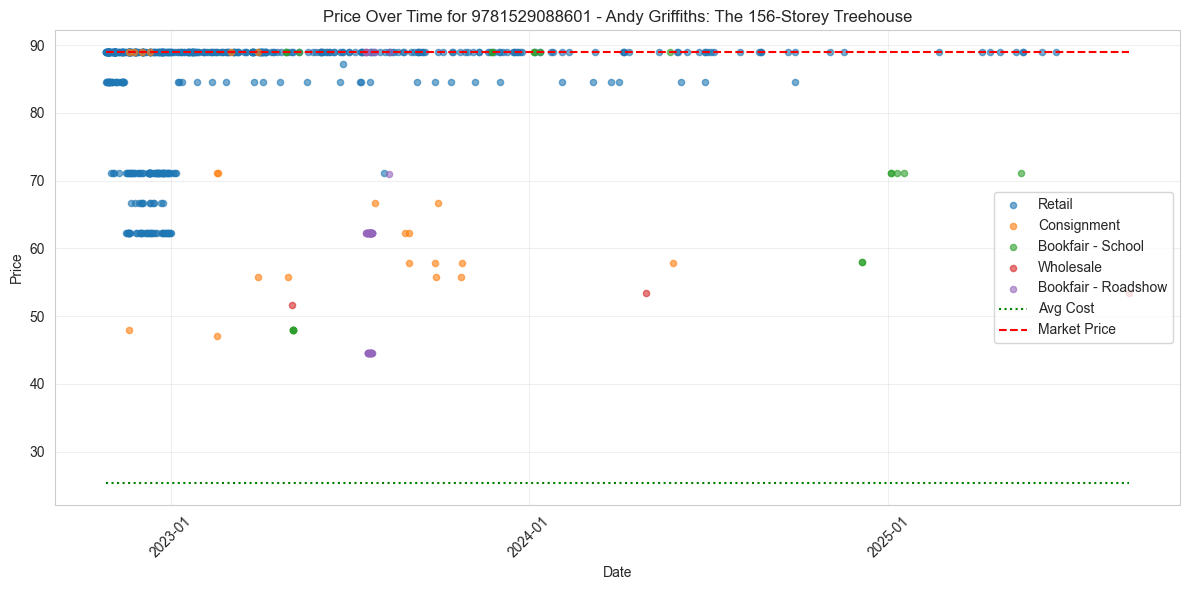

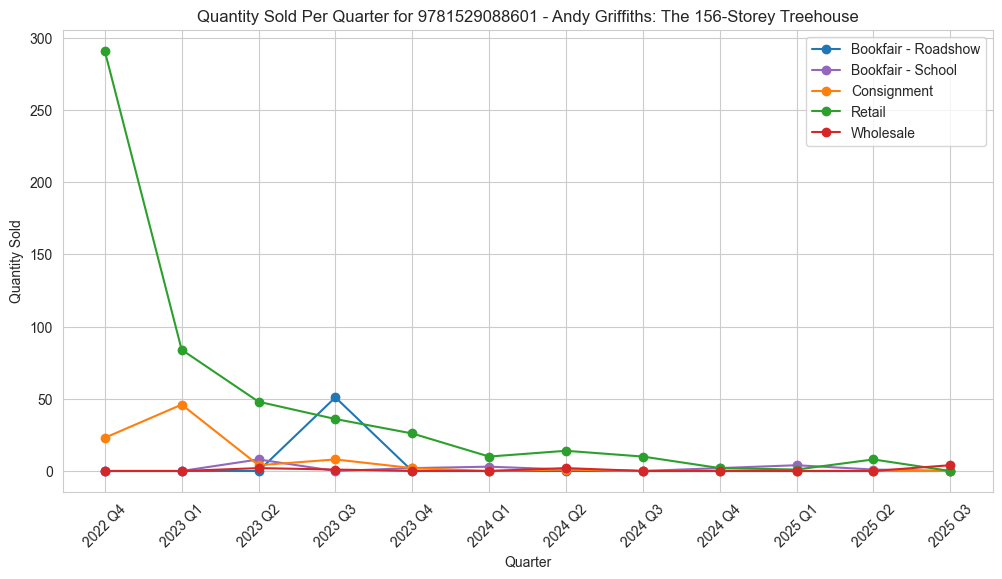

In [62]:
plot_price_over_time(merged_df, product='9781529088601')
plot_quarterly_channel_product(merged_df, product='9781529088601')

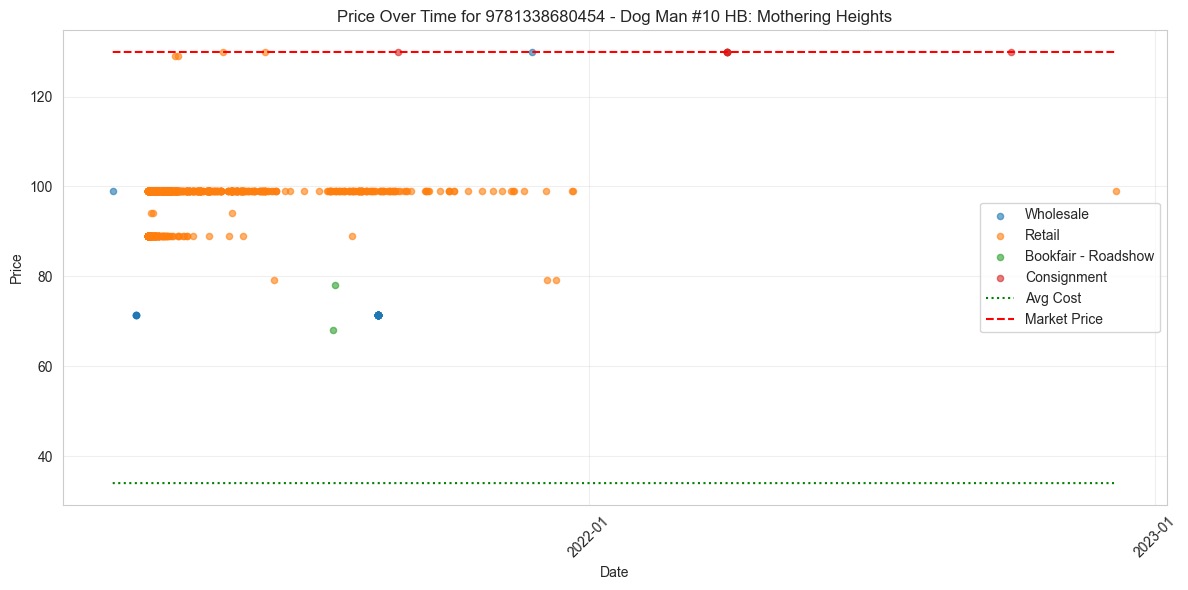

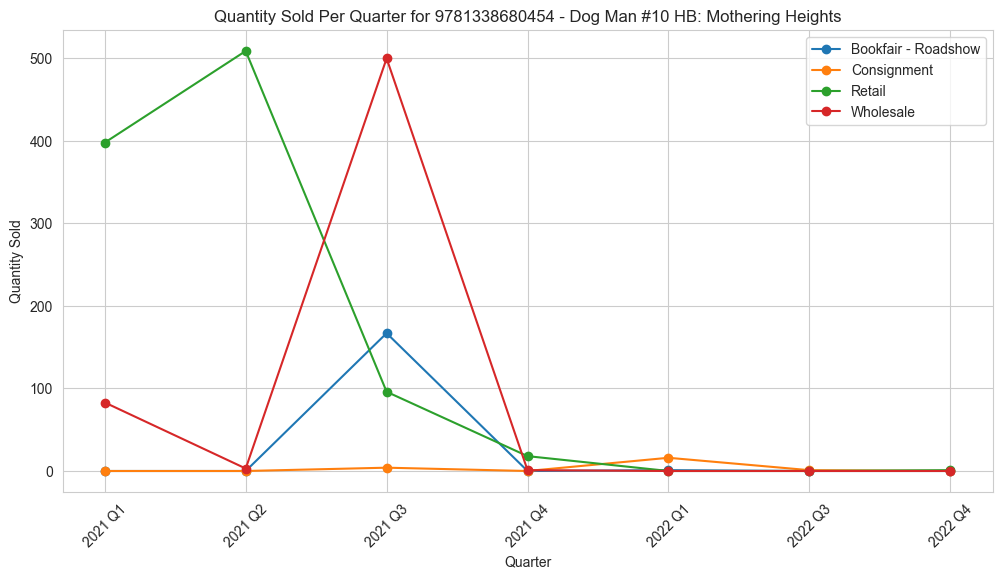

In [63]:
plot_price_over_time(merged_df, product='9781338680454')
plot_quarterly_channel_product(merged_df, product='9781338680454')

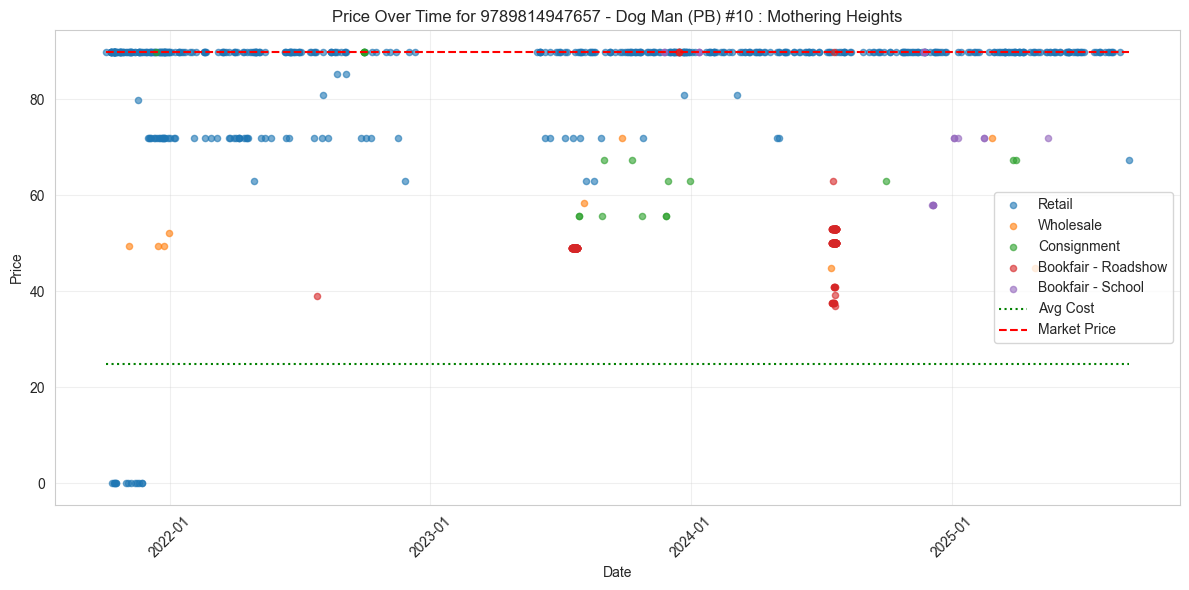

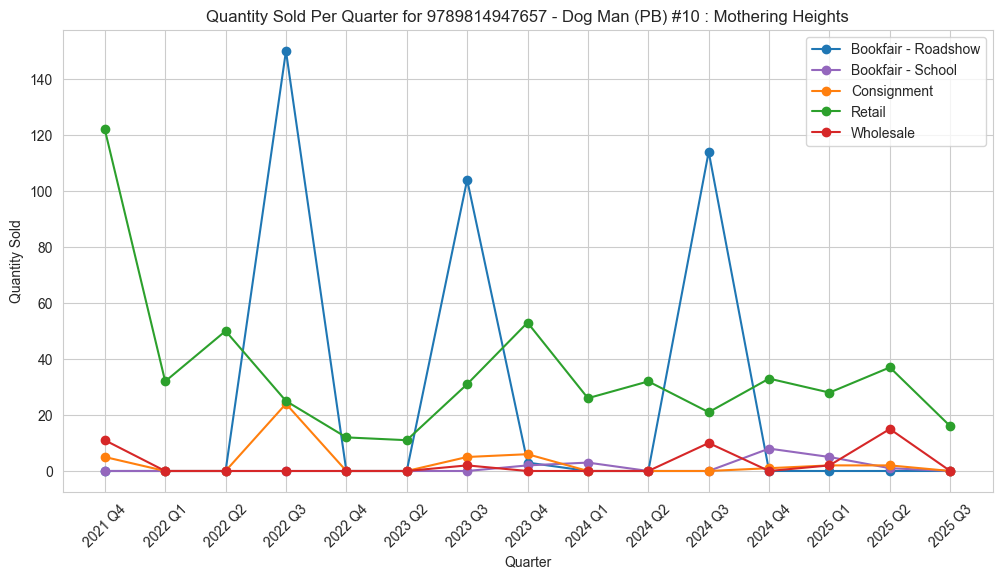

In [64]:
plot_price_over_time(merged_df, product='9789814947657')
plot_quarterly_channel_product(merged_df, product='9789814947657')

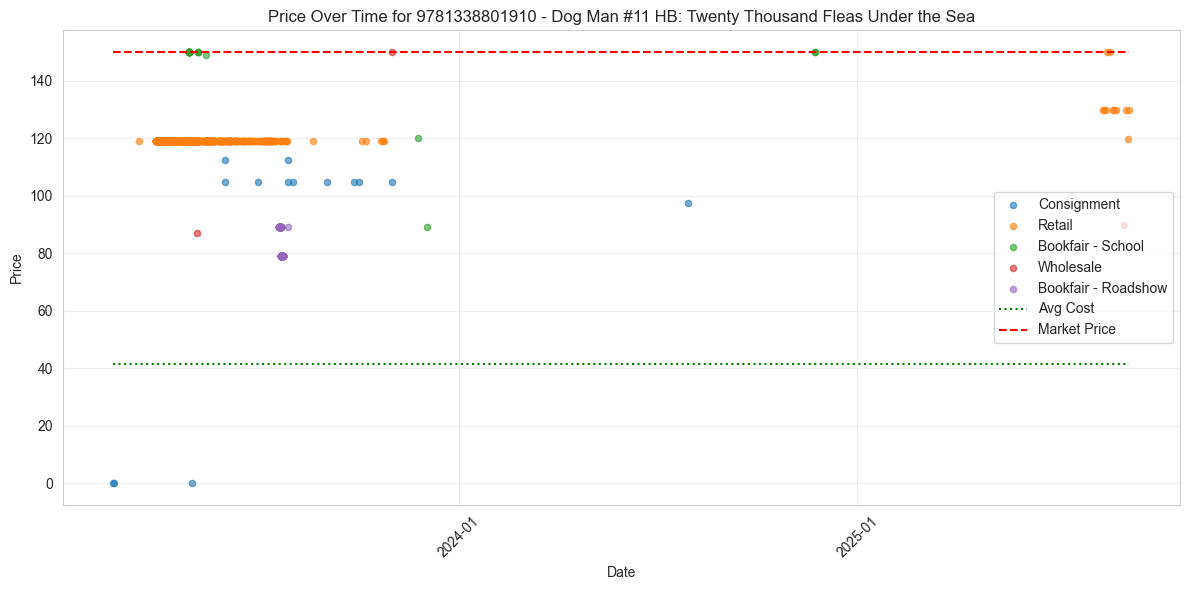

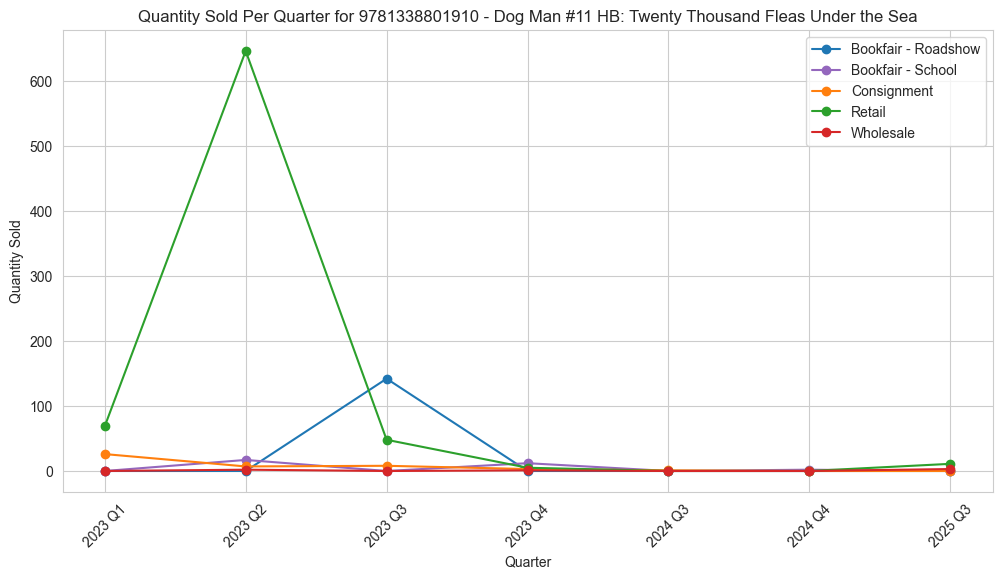

In [65]:
plot_price_over_time(merged_df, product='9781338801910')
plot_quarterly_channel_product(merged_df, product='9781338801910')

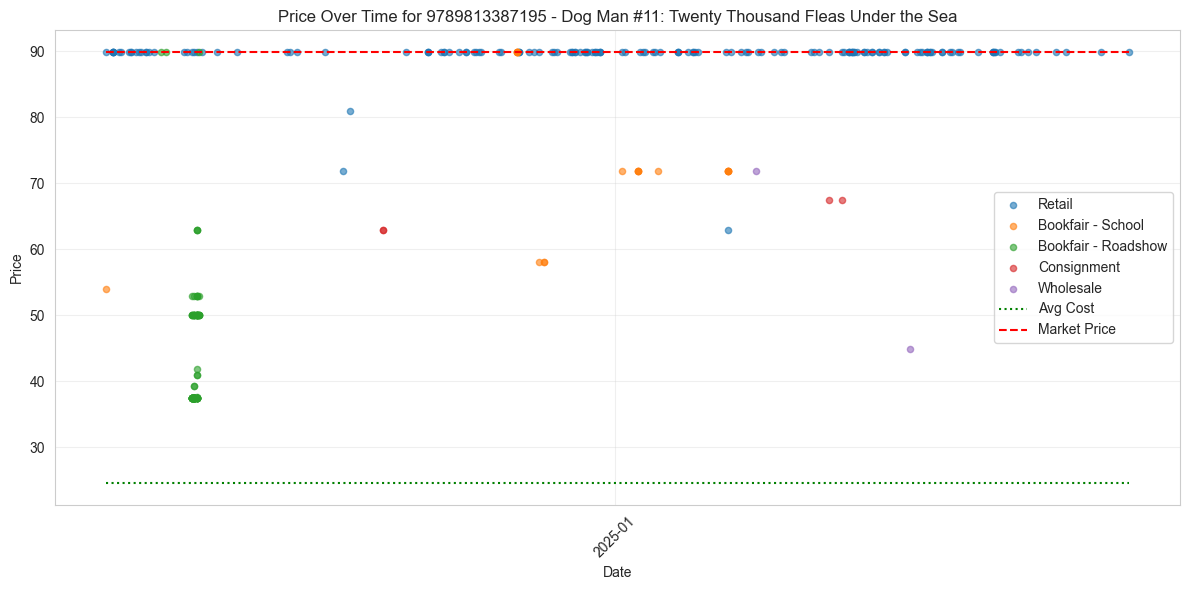

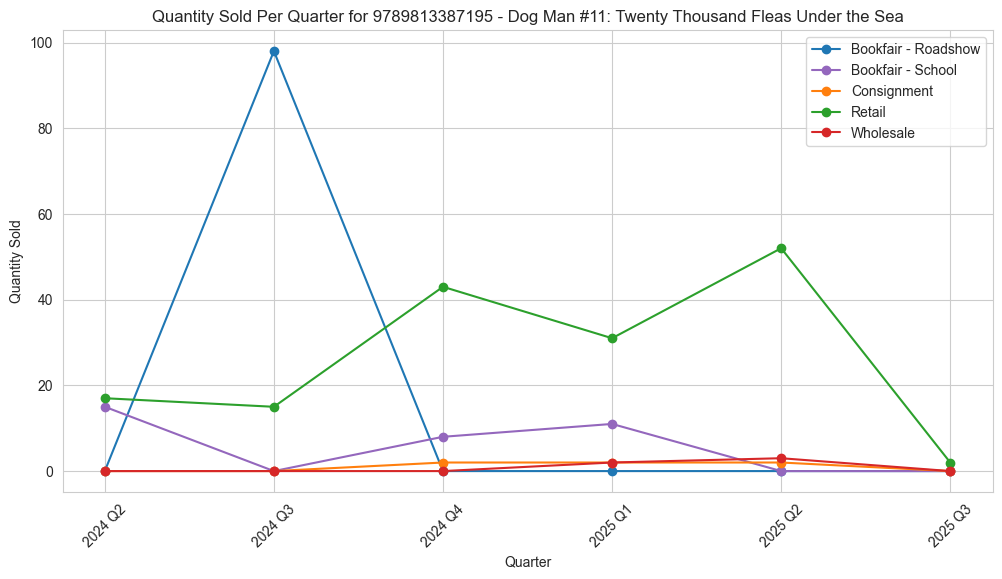

In [66]:
plot_price_over_time(merged_df, product='9789813387195')
plot_quarterly_channel_product(merged_df, product='9789813387195')

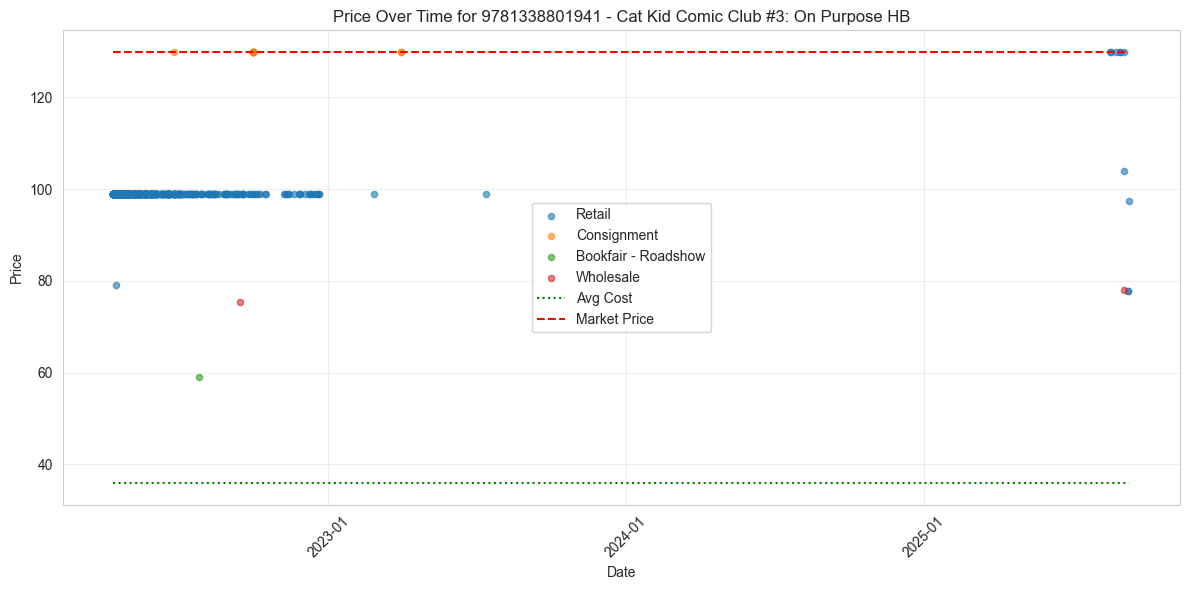

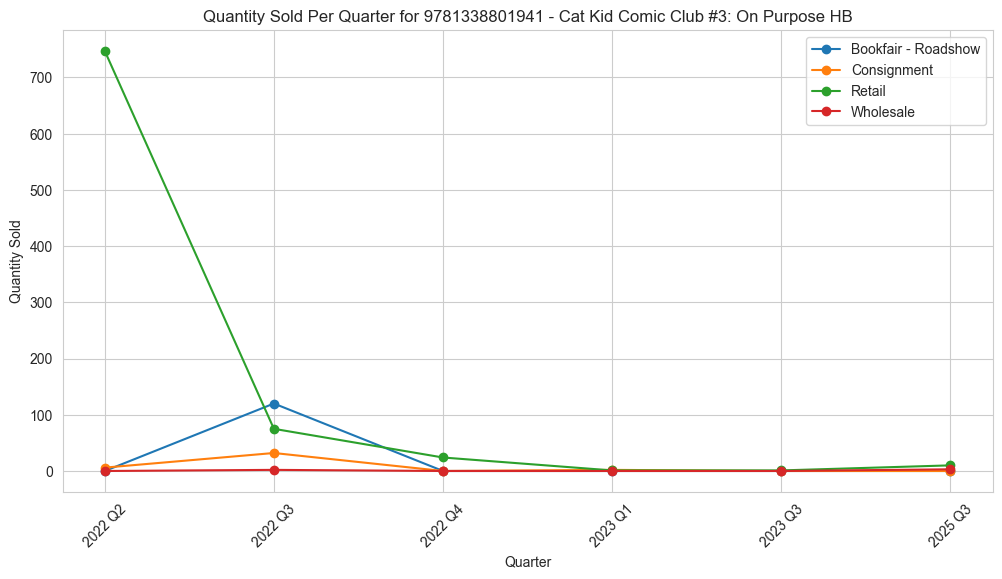

In [67]:
plot_price_over_time(merged_df, product='9781338801941')
plot_quarterly_channel_product(merged_df, product='9781338801941')

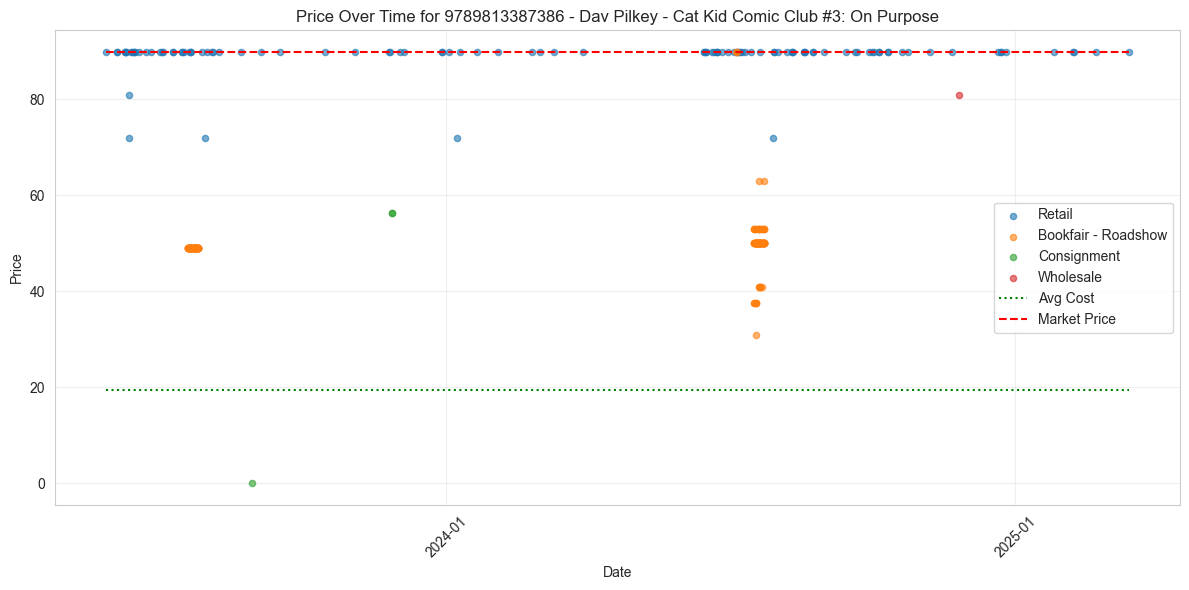

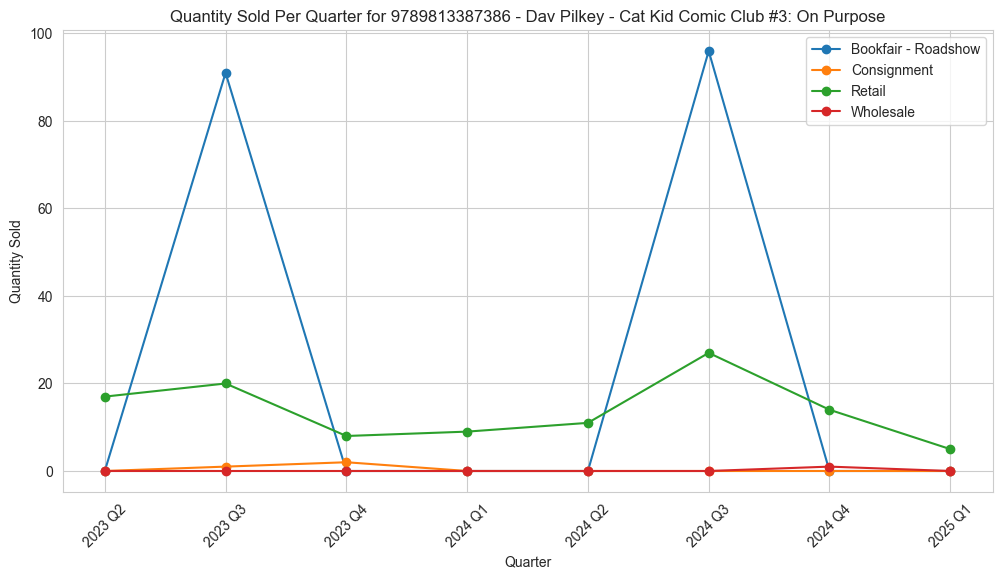

In [68]:
plot_price_over_time(merged_df, product='9789813387386')
plot_quarterly_channel_product(merged_df, product='9789813387386')


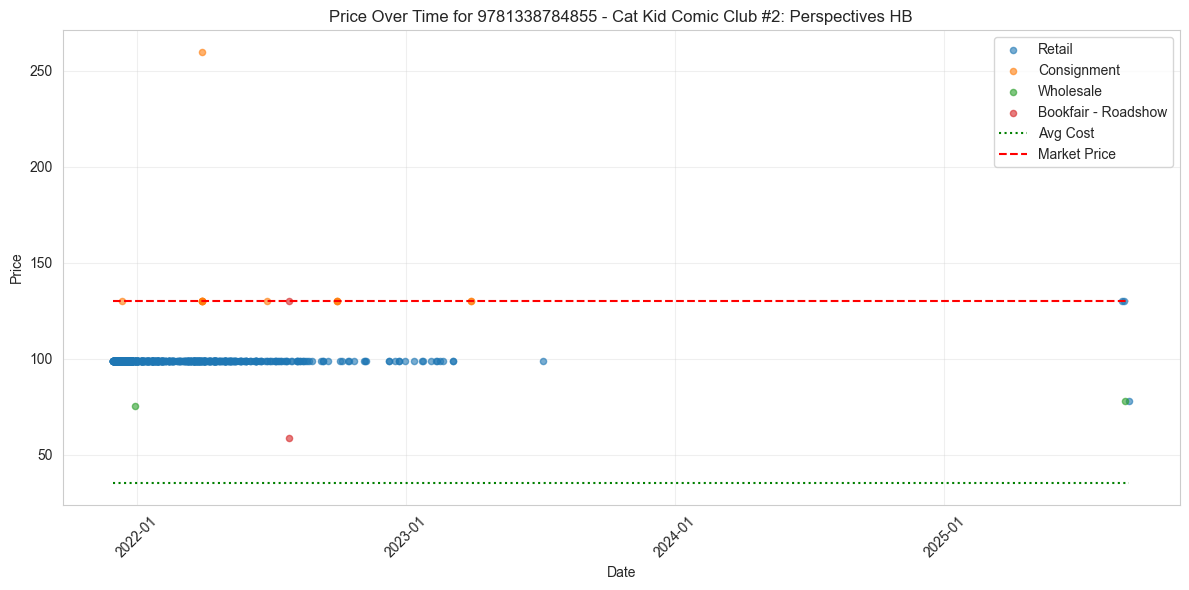

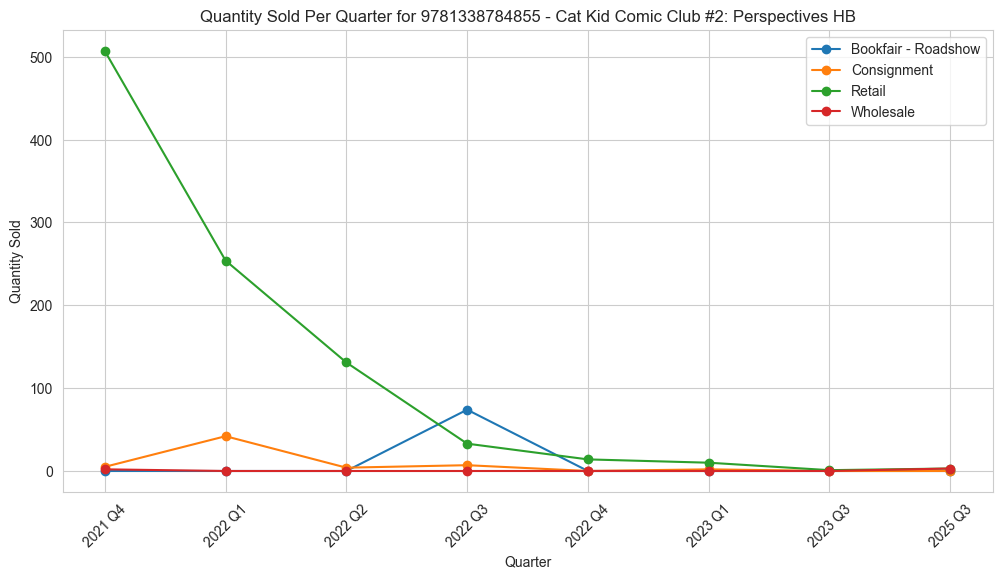

In [69]:
plot_price_over_time(merged_df, product='9781338784855')
plot_quarterly_channel_product(merged_df, product='9781338784855')



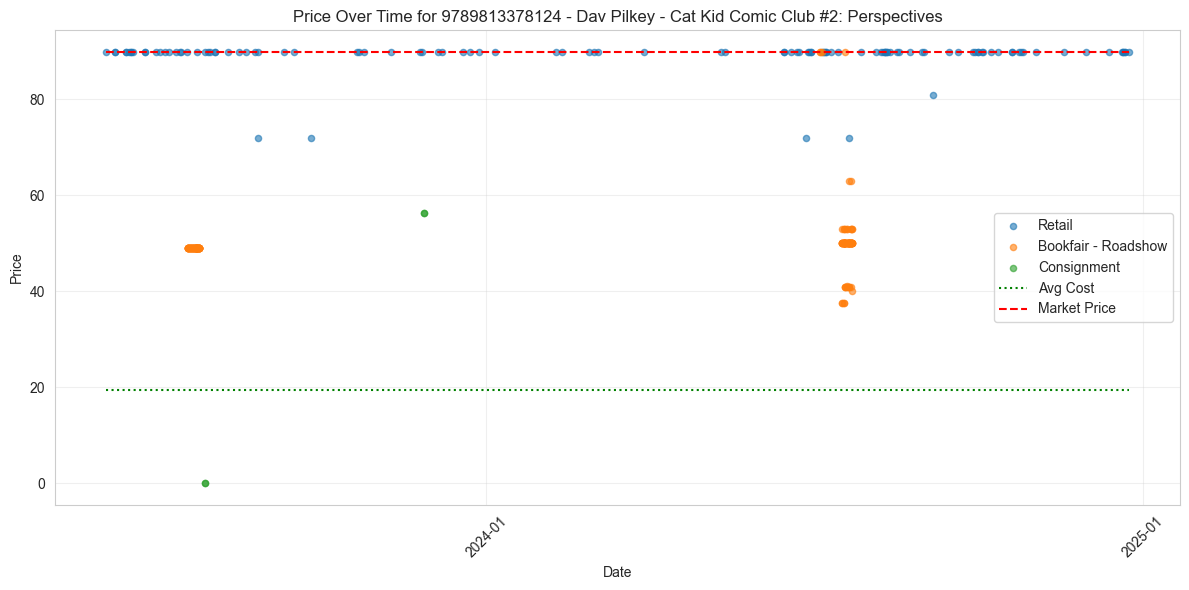

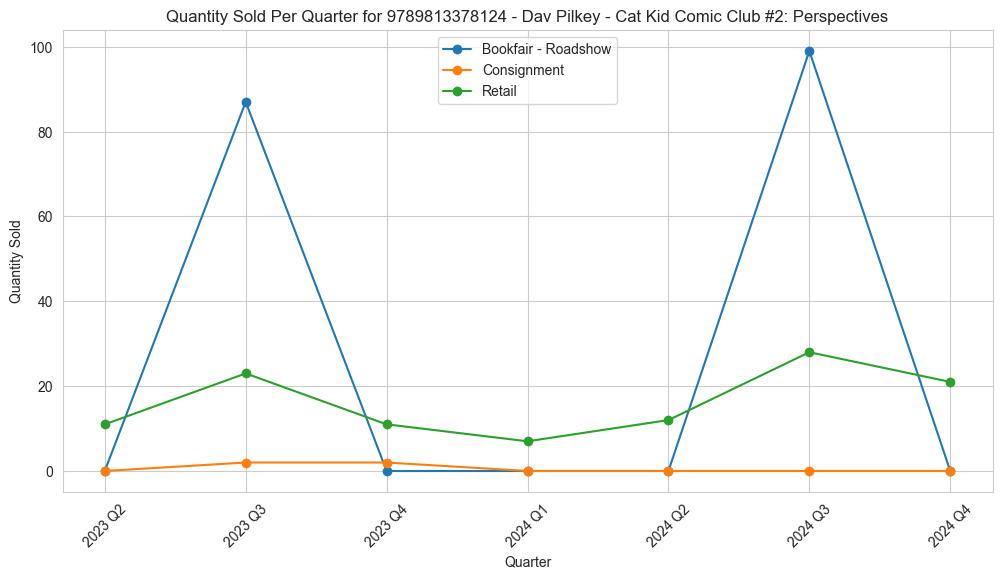

In [70]:
plot_price_over_time(merged_df, product='9789813378124')
plot_quarterly_channel_product(merged_df, product='9789813378124')

## Hardback (HB) or Paperback are the main factors influencing sales distribution between Retail and Roadshow.
## Hardback (HB): Retail contributes more significantly to sales.
## Paperback: Sales are similar overall, but Roadshow generally accounts for a higher quantity sold compared to Retail.


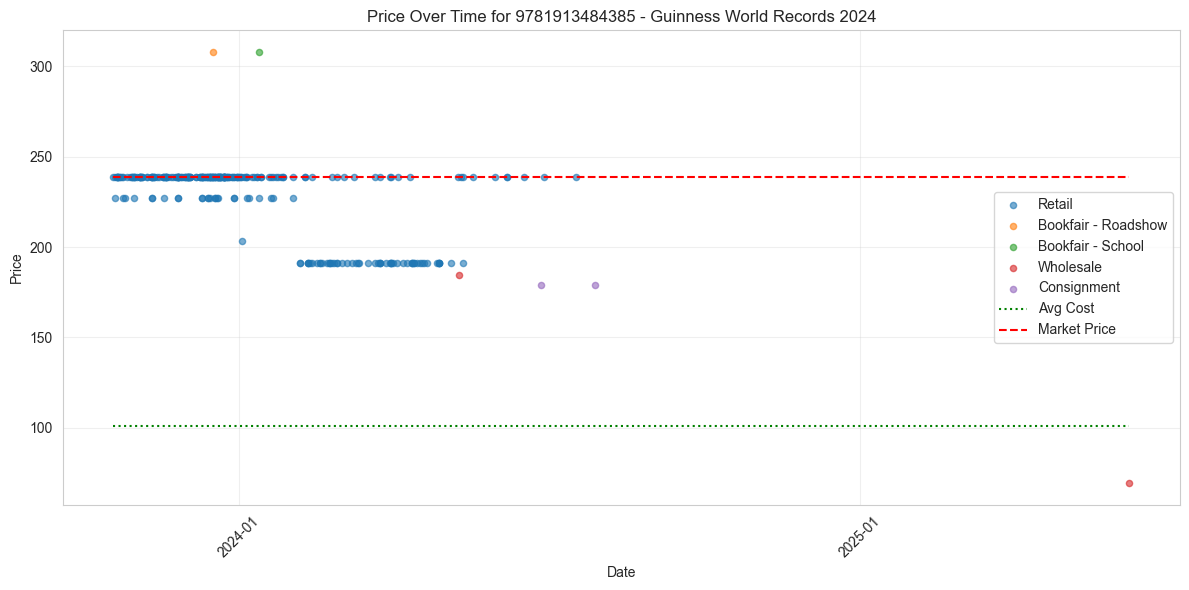

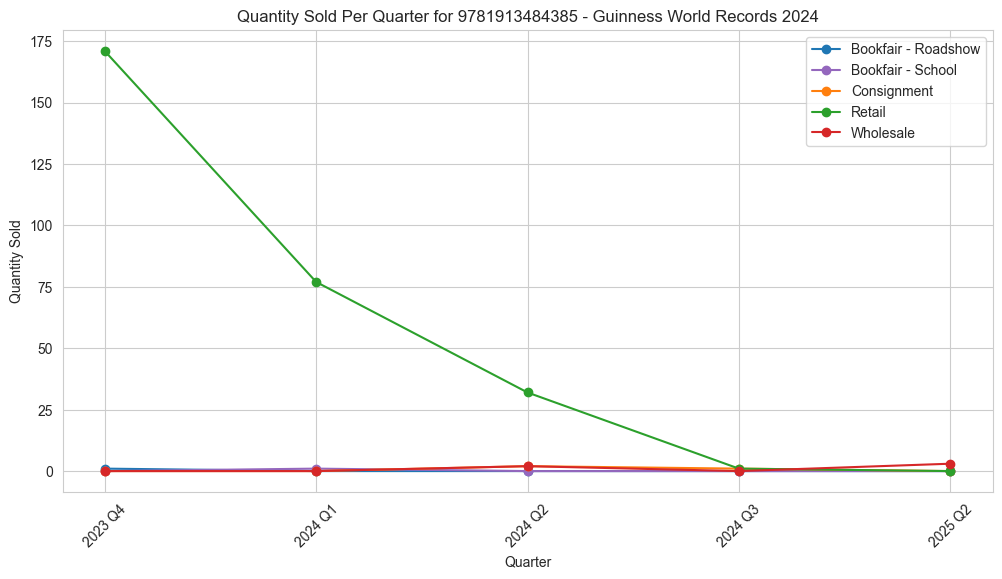

In [71]:
plot_price_over_time(merged_df, product='9781913484385')
plot_quarterly_channel_product(merged_df, product='9781913484385')

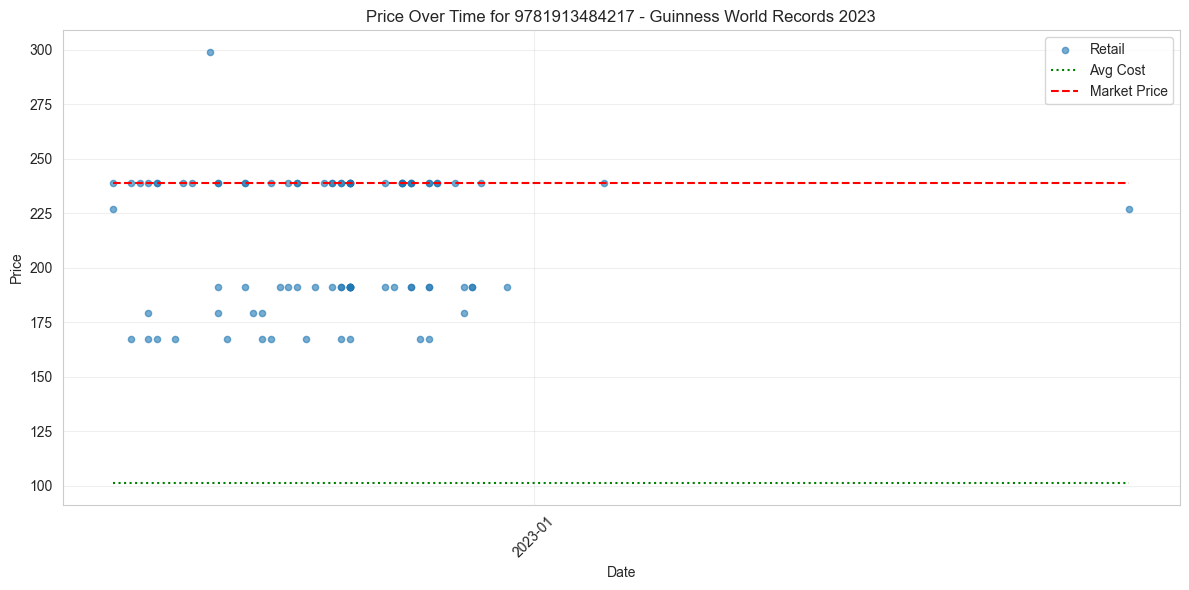

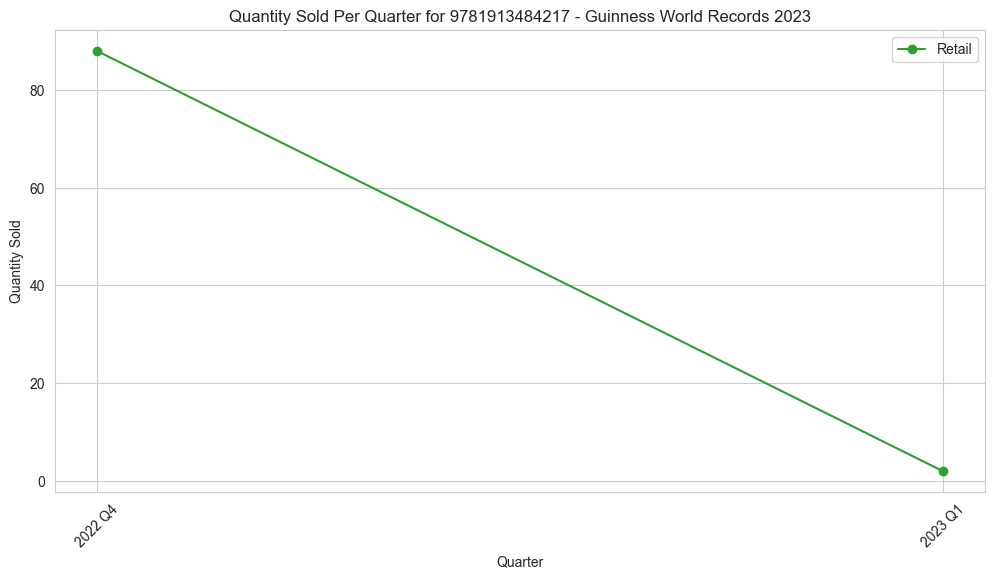

In [72]:
plot_price_over_time(merged_df, product='9781913484217')
plot_quarterly_channel_product(merged_df, product='9781913484217')

## Books with yearly series typically sell within the corresponding year and are then replaced by the new year’s series. Sales are primarily driven through the retail channel.


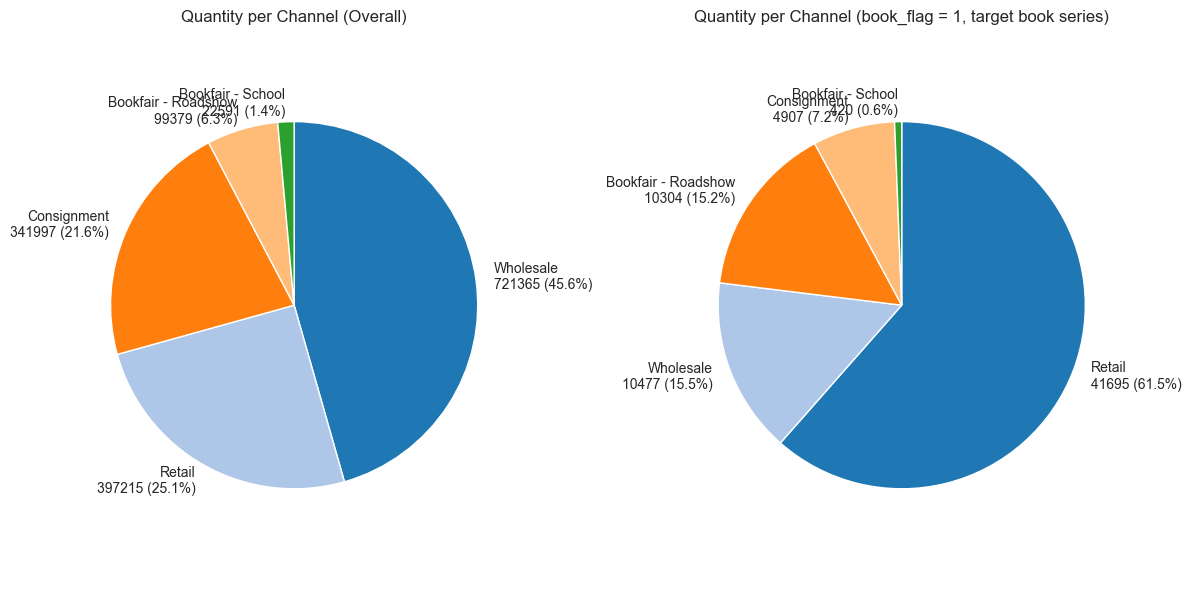

In [81]:

import re
import pandas as pd
import matplotlib.pyplot as plt

# --- 1) Build book_flag from title ---
keywords = ['Guinness World', 'Dog Man', 'Cat Kid', 'Captain Underpants', 'Andy Griffiths']

# Case-insensitive regex with boundaries; escape keywords safely
pattern = r'(?i)\b(?:' + '|'.join(map(re.escape, keywords)) + r')\b'

merged_df['book_flag'] = (
    merged_df['title']
    .fillna('')
    .str.contains(pattern, regex=True)
    .astype(int)
)

# --- 2) Helper to aggregate quantity per channel ---
def aggregate_by_channel(df: pd.DataFrame) -> pd.Series:
    required_cols = {'channel', 'quantity'}
    missing = required_cols - set(df.columns)
    if missing:
        raise ValueError(f"Missing required columns: {missing}")
    temp = df.copy()
    temp = temp.dropna(subset=['channel', 'quantity'])
    temp['quantity'] = pd.to_numeric(temp['quantity'], errors='coerce')
    temp = temp.dropna(subset=['quantity'])
    return temp.groupby('channel')['quantity'].sum().sort_values(ascending=False)

# --- 3) Plot (display-only, no saving) ---
def plot_pies(df: pd.DataFrame):
    overall = aggregate_by_channel(df)
    has_flag = 'book_flag' in df.columns and (df['book_flag'] == 1).any()
    flagged = aggregate_by_channel(df[df['book_flag'] == 1]) if has_flag else None

    nplots = 1 + (1 if flagged is not None and not flagged.empty else 0)
    fig, axes = plt.subplots(1, nplots, figsize=(6*nplots, 6))
    axes = [axes] if nplots == 1 else axes

    palette = plt.cm.tab20.colors

    def draw_pie(ax, series: pd.Series, title: str):
        total = float(series.sum())
        pct = (series / total * 100).round(1)
        labels = [f"{idx}\n{val:.0f} ({p}%)" for idx, val, p in zip(series.index, series.values, pct.values)]
        ax.pie(
            series.values,
            labels=labels,
            colors=palette[:len(series)],
            startangle=90,
            counterclock=False,
            wedgeprops={'linewidth': 1, 'edgecolor': 'white'}
        )
        ax.set_title(title)
        ax.axis('equal')

    draw_pie(axes[0], overall, "Quantity per Channel (Overall)")
    if nplots == 2:
        draw_pie(axes[1], flagged, "Quantity per Channel (book_flag = 1, target book series)")
    plt.tight_layout()
    plt.show()

# --- 4) Use it ---
plot_pies(merged_df)



## Due to the findings above, we have filtered out data from wholesale and consignment channels because of their high discount rates and abnormal sold quantities.
## For the target book series, retail and roadshow channels account for the majority of the data.

# Sale distribution for each store


C:\Users\Graham\AppData\Local\Temp\ipykernel_14508\1802146980.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_top['label'] = filtered_top['location'] + " - " + filtered_top['shopname']


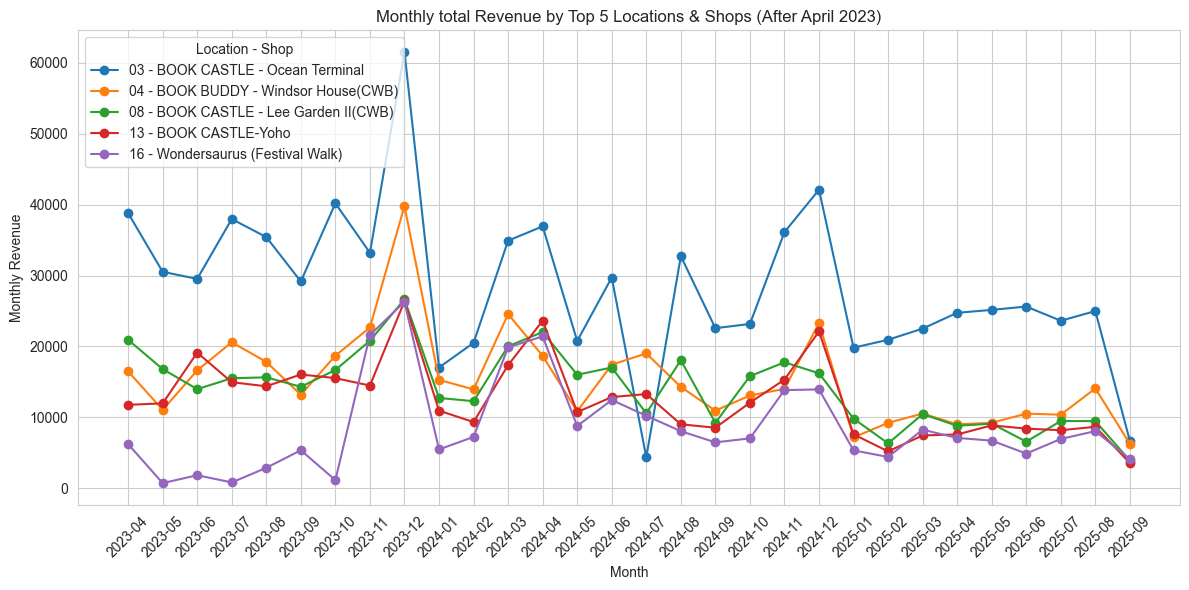

In [73]:
# Filter Retail channel
retail_df = merged_df[merged_df['channel'] == 'Retail'].copy()
retail_df['trandate'] = pd.to_datetime(retail_df['trandate'])

# Filter for dates after April 2023
filtered_df = retail_df[retail_df['trandate'] > '2023-04-01'].copy()
filtered_df['month'] = filtered_df['trandate'].dt.to_period('M')

# Group by month, location, and shopname, calculate monthly revenue
monthly_avg = (
    filtered_df.groupby(['month', 'location', 'shopname'])['amount']
    .sum()
    .reset_index()
)

# Get top 5 locations by total revenue
top_locations = monthly_avg.groupby('location')['amount'].sum().nlargest(5).index
filtered_top = monthly_avg[monthly_avg['location'].isin(top_locations)]

# ✅ Create a combined label for legend: "Location - Shopname"
filtered_top['label'] = filtered_top['location'] + " - " + filtered_top['shopname']

# Pivot for plotting using combined label
pivot_df = filtered_top.pivot(index='month', columns='label', values='amount').sort_index()
pivot_df.index = pivot_df.index.astype(str)

# Plot line graph
plt.figure(figsize=(12, 6))
for label in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[label], marker='o', label=label)

plt.title('Monthly total Revenue by Top 5 Locations & Shops (After April 2023)')
plt.xlabel('Month')
plt.ylabel('Monthly Revenue')
plt.legend(title='Location - Shop', loc='upper left')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\Graham\AppData\Local\Temp\ipykernel_14508\202750340.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_top['label'] = filtered_top['location'] + " - " + filtered_top['shopname']


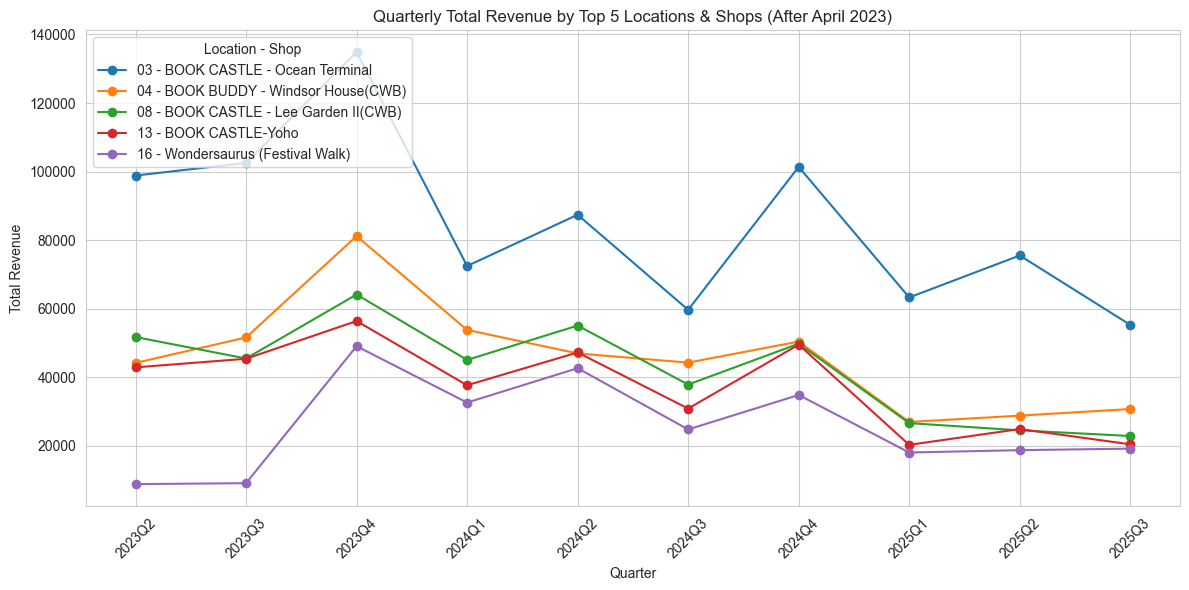

In [74]:
# Filter Retail channel
retail_df = merged_df[merged_df['channel'] == 'Retail'].copy()
retail_df['trandate'] = pd.to_datetime(retail_df['trandate'])

# Filter for dates after April 2023
filtered_df = retail_df[retail_df['trandate'] > '2023-04-01'].copy()
filtered_df['quarter'] = filtered_df['trandate'].dt.to_period('Q')  # ✅ Quarterly

# Group by quarter, location, and shopname, calculate total revenue
quarterly_sum = (
    filtered_df.groupby(['quarter', 'location', 'shopname'])['amount']
    .sum()
    .reset_index()
)

# Get top 5 locations by total revenue
top_locations = quarterly_sum.groupby('location')['amount'].sum().nlargest(5).index
filtered_top = quarterly_sum[quarterly_sum['location'].isin(top_locations)]

# ✅ Create combined label for legend: "Location - Shopname"
filtered_top['label'] = filtered_top['location'] + " - " + filtered_top['shopname']

# Pivot for plotting using combined label
pivot_df = filtered_top.pivot(index='quarter', columns='label', values='amount').sort_index()
pivot_df.index = pivot_df.index.astype(str)

# Plot line graph
plt.figure(figsize=(12, 6))
for label in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[label], marker='o', label=label)

plt.title('Quarterly Total Revenue by Top 5 Locations & Shops (After April 2023)')
plt.xlabel('Quarter')
plt.ylabel('Total Revenue')
plt.legend(title='Location - Shop', loc='upper left')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\Graham\AppData\Local\Temp\ipykernel_14508\2163283450.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_top['label'] = filtered_top['location'] + " - " + filtered_top['shopname']


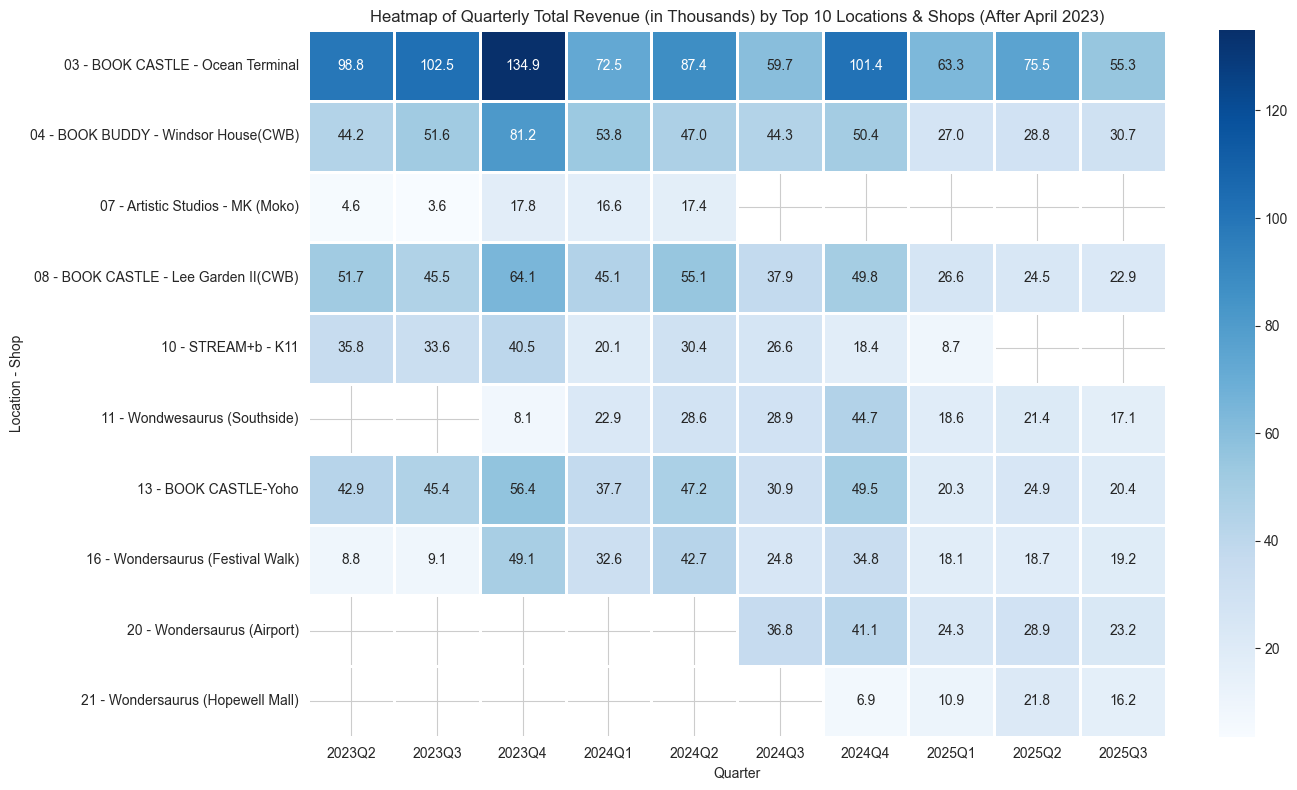

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter Retail channel
retail_df = merged_df[merged_df['channel'] == 'Retail'].copy()
retail_df['trandate'] = pd.to_datetime(retail_df['trandate'])

# Filter for dates after April 2023
filtered_df = retail_df[retail_df['trandate'] > '2023-04-01'].copy()
filtered_df['quarter'] = filtered_df['trandate'].dt.to_period('Q')  # Quarterly

# Group by quarter, location, and shopname, calculate total revenue
quarterly_sum = (
    filtered_df.groupby(['quarter', 'location', 'shopname'])['amount']
    .sum()
    .reset_index()
)

# Get top 10 locations by total revenue
top_locations = quarterly_sum.groupby('location')['amount'].sum().nlargest(10).index
filtered_top = quarterly_sum[quarterly_sum['location'].isin(top_locations)]

# Combine location and shopname for clarity
filtered_top['label'] = filtered_top['location'] + " - " + filtered_top['shopname']

# Pivot for heatmap
pivot_df = filtered_top.pivot(index='label', columns='quarter', values='amount').sort_index()
pivot_df.columns = pivot_df.columns.astype(str)

# Convert revenue to thousands
pivot_df = pivot_df / 1000

# Plot heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_df, annot=True, fmt=".1f", cmap="Blues", linewidths=1)
plt.title('Heatmap of Quarterly Total Revenue (in Thousands) by Top 10 Locations & Shops (After April 2023)')
plt.xlabel('Quarter')
plt.ylabel('Location - Shop')
plt.tight_layout()
plt.show()



# Holiday/Season effect related to sale


In [76]:
import pandas as pd

daily_df=retail_df.groupby(['trandate'])['amount'].sum().reset_index()


# Load holiday data
holidays_df = pd.read_csv("hong_kong_public_holidays_2014_2025_full.csv")
holidays_df['Date'] = pd.to_datetime(holidays_df['Date'])


# Merge retail data with holiday info
daily_df = daily_df.merge(holidays_df, left_on='trandate', right_on='Date', how='left')

# Create holiday flag
daily_df['is_holiday'] = daily_df['Holiday'].notna()

# Sort by date for rolling calculation
daily_df = daily_df.sort_values('trandate')

# -----------------------------
# 2. Compute non-holiday mean (baseline)
# -----------------------------
non_holiday_mean = daily_df[daily_df['Holiday'].isna()]['amount'].mean()

# Compute uplift vs non-holiday mean
daily_df['uplift_vs_mean'] = daily_df.apply(
    lambda row: ((row['amount'] - non_holiday_mean) / non_holiday_mean * 100) if row['is_holiday'] else 0,
    axis=1
)


daily_df['rolling_30d_sales'] = daily_df['amount'].rolling(window=30, min_periods=1).mean()

# Compute uplift vs rolling average
daily_df['uplift_vs_rolling'] = daily_df.apply(
    lambda row: ((row['amount'] - row['rolling_30d_sales']) / row['rolling_30d_sales'] * 100) if row['is_holiday'] else 0,
    axis=1
)

# -----------------------------
# 4. Aggregate by holiday name for both metrics
# -----------------------------
holiday_impact = (
    daily_df.dropna(subset=['Holiday'])
    .groupby('Holiday')[['uplift_vs_mean', 'uplift_vs_rolling']]
    .mean()
    .reset_index()
    .sort_values('uplift_vs_mean', ascending=False)
)

# -----------------------------
# 5. Visualization: Grouped bar chart
# -----------------------------
holiday_melted = holiday_impact.melt(id_vars='Holiday', value_vars=['uplift_vs_mean', 'uplift_vs_rolling'],
                                     var_name='Metric', value_name='Average Uplift (%)')

fig = px.bar(holiday_melted, x='Holiday', y='Average Uplift (%)', color='Metric', barmode='group',
             title='Holiday Impact Comparison: Non-Holiday Mean vs 30days Rolling',
             labels={'holiday_name': 'Holiday', 'Average Uplift (%)': 'Avg Uplift (%)'},
             text='Average Uplift (%)')
fig.update_traces(texttemplate='%{text:.1f}%', textposition='outside')
fig.show()




## We can see that the top five sales periods occur in Q4, driven by the Christmas holiday and the start of the school year. In contrast, Q1, which includes the Chinese New Year, is the season with the lowest sales.
